In [1]:
import os
import shutil

import numpy as np
import tensorflow as tf

2023-03-18 01:29:18.772375: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 01:29:18.864541: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
import tensorflow as tf
import random
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  2


In [2]:
import os
os.getcwd()

'/home/yang'

In [3]:
os.chdir('Test')
os.getcwd()

'/home/yang/Test'

In [4]:
!find . -name ".ipynb_checkpoints" -print -delete
!find . -name ".DS_Store" -print -delete

In [7]:
import cv2

# Load video
video_path = "videos/17123.mp4"
cap = cv2.VideoCapture(video_path)

# Get total number of frames
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get shape of each frame
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Print results
print("Total number of frames:", num_frames)
print("Frame shape:", (frame_width, frame_height))


Total number of frames: 131
Frame shape: (640, 480)


In [6]:
import os

folder_path = 'videos'  # set the path to the videos folder

count = 0
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.mp4') or file.endswith('.avi') or file.endswith('.mov'):
            count += 1

print(f"Total number of video files under '{folder_path}' folder: {count}")


Total number of video files under 'videos' folder: 4604


In [9]:
import os
import cv2
import random
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

VIDEO_PATH = "videos"
FRAME_PATH = "frames"

def extract_frames(video_file):
    # Open Video File
    video_capture = cv2.VideoCapture(os.path.join(VIDEO_PATH, video_file))

    # Calculate total frames in video
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    # Choose 32 random frames to extract
    index_arr = [i for i in range(total_frames)]
    index_arr = sorted(random.sample(index_arr, k=32))

    frame_count = 0
    for frame_index in range(total_frames):
        ret, frame = video_capture.read()

        if ret:
            # Save frame only if its index is in index_arr
            if frame_index in index_arr:
                img_number = str(frame_count).zfill(5)
                name = os.path.join(FRAME_PATH, f"{video_file.split('.')[0]}_frame_{img_number}.jpg")
                cv2.imwrite(name, frame)
                frame_count += 1

                # Remove the index from index_arr so that each index is used only once
                index_arr.remove(frame_index)

                # Exit loop after all required frames have been saved
                if frame_count == 32:
                    break
        else:
            break

    video_capture.release()

# Iterate over video files
video_files = os.listdir(VIDEO_PATH)
with ThreadPoolExecutor() as executor:
    futures = []
    for video_file in video_files:
        futures.append(executor.submit(extract_frames, video_file))
    for future in tqdm(futures):
        future.result()






100%|███████████████████████████████████████| 4604/4604 [04:14<00:00, 18.10it/s]


In [7]:
import os
import cv2

FRAME_PATH = "frames"

# count number of image files in frames directory
total_frames = 0
for file_name in os.listdir(FRAME_PATH):
    if file_name.endswith(".jpg"):
        total_frames += 1

print(f"Total frames: {total_frames}")

# 4605*32 = 147328

Total frames: 147328


In [8]:
import os

FRAME_PATH = "frames"

# create a dictionary to store the number of frames for each video file
video_frames = {}

# iterate over all files in the frames directory
for file_name in os.listdir(FRAME_PATH):
    if file_name.endswith(".jpg"):
        # extract the video file name from the image file name
        video_file = file_name.split("_frame_")[0] + ".mp4"
        # increment the frame count for the video file
        if video_file in video_frames:
            video_frames[video_file] += 1
        else:
            video_frames[video_file] = 1

# check which video files have fewer than 32 frames
for video_file, frame_count in video_frames.items():
    if frame_count < 32:
        print(f"Video file {video_file} has only {frame_count} frames.")
    elif frame_count > 32:
        print(f"Video file {video_file} has more than 32 frames.")



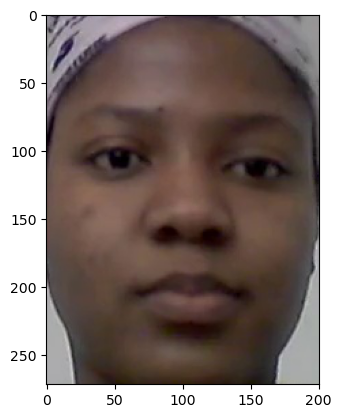

In [13]:
from retinaface import RetinaFace
from PIL import Image
import matplotlib.pyplot as plt
# Load RetinaFace detector

# Load the original image
img_path = "frames/17123_frame_00000.jpg"
img = Image.open(img_path)

# Extract the face from the image using RetinaFace
faces = RetinaFace.extract_faces(img_path=img_path, align=False)

# Display the extracted face
if faces:
    face_img = Image.fromarray(faces[0])
    plt.imshow(face_img)
else:
    print("No face detected in the image.")

# Load the image

In [14]:
faces[0].shape

(272, 201, 3)

In [5]:
# Get list of all frame paths
frame_paths = sorted([os.path.join("frames", filename) for filename in os.listdir("frames")])
print(frame_paths[0:32])

['frames/17123_frame_00000.jpg', 'frames/17123_frame_00001.jpg', 'frames/17123_frame_00002.jpg', 'frames/17123_frame_00003.jpg', 'frames/17123_frame_00004.jpg', 'frames/17123_frame_00005.jpg', 'frames/17123_frame_00006.jpg', 'frames/17123_frame_00007.jpg', 'frames/17123_frame_00008.jpg', 'frames/17123_frame_00009.jpg', 'frames/17123_frame_00010.jpg', 'frames/17123_frame_00011.jpg', 'frames/17123_frame_00012.jpg', 'frames/17123_frame_00013.jpg', 'frames/17123_frame_00014.jpg', 'frames/17123_frame_00015.jpg', 'frames/17123_frame_00016.jpg', 'frames/17123_frame_00017.jpg', 'frames/17123_frame_00018.jpg', 'frames/17123_frame_00019.jpg', 'frames/17123_frame_00020.jpg', 'frames/17123_frame_00021.jpg', 'frames/17123_frame_00022.jpg', 'frames/17123_frame_00023.jpg', 'frames/17123_frame_00024.jpg', 'frames/17123_frame_00025.jpg', 'frames/17123_frame_00026.jpg', 'frames/17123_frame_00027.jpg', 'frames/17123_frame_00028.jpg', 'frames/17123_frame_00029.jpg', 'frames/17123_frame_00030.jpg', 'frames

In [6]:
frame_groups = [frame_paths[i:i+32] for i in range(0, len(frame_paths), 32)]
print(frame_groups[:2])


[['frames/17123_frame_00000.jpg', 'frames/17123_frame_00001.jpg', 'frames/17123_frame_00002.jpg', 'frames/17123_frame_00003.jpg', 'frames/17123_frame_00004.jpg', 'frames/17123_frame_00005.jpg', 'frames/17123_frame_00006.jpg', 'frames/17123_frame_00007.jpg', 'frames/17123_frame_00008.jpg', 'frames/17123_frame_00009.jpg', 'frames/17123_frame_00010.jpg', 'frames/17123_frame_00011.jpg', 'frames/17123_frame_00012.jpg', 'frames/17123_frame_00013.jpg', 'frames/17123_frame_00014.jpg', 'frames/17123_frame_00015.jpg', 'frames/17123_frame_00016.jpg', 'frames/17123_frame_00017.jpg', 'frames/17123_frame_00018.jpg', 'frames/17123_frame_00019.jpg', 'frames/17123_frame_00020.jpg', 'frames/17123_frame_00021.jpg', 'frames/17123_frame_00022.jpg', 'frames/17123_frame_00023.jpg', 'frames/17123_frame_00024.jpg', 'frames/17123_frame_00025.jpg', 'frames/17123_frame_00026.jpg', 'frames/17123_frame_00027.jpg', 'frames/17123_frame_00028.jpg', 'frames/17123_frame_00029.jpg', 'frames/17123_frame_00030.jpg', 'frame

In [19]:
from retinaface import RetinaFace
from PIL import Image
import os
import gc
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
# Define function to extract face from frame
def extract_face(frame_path, face_locations, no_face_files):
    # Load the original image
    img = Image.open(frame_path)

    # Extract the face from the image using RetinaFace
    faces = RetinaFace.extract_faces(img_path=frame_path, align=False)

    # If no face detected, add the frame to the list of frames without a face
    if not faces:
        print(f"No face detected in frame: {frame_path}")
        no_face_files.append(frame_path)

        # If this is the first frame in the group, store the location of the previous face
        if not face_locations:
            print(f"No face detected in the first frame of the group: {frame_path}")
            return None
        else:
            facial_area = face_locations[0]
    else:
        # If face detected, save the extracted face and update the facial area
        face_img = Image.fromarray(faces[0])
        save_path = f"crop_frames/{os.path.basename(frame_path)}"
        face_img.save(save_path)
        facial_area = RetinaFace.detect_faces(img_path=frame_path)['face_1']['facial_area']
        face_locations.insert(0, facial_area)


    return facial_area

# Define function to extract faces from all frames in a group
def extract_faces_from_group(group):
    # Keep track of the facial area in the first frame
    face_locations = []

    # Keep track of frames without a face
    no_face_files = []

    # Extract faces from each frame in the group
    for frame_path in group:
        facial_area = extract_face(frame_path, face_locations, no_face_files)


    for file_path in no_face_files:
        img = Image.open(file_path)
        cropped_img = img.crop((face_locations[0][0], face_locations[0][1], face_locations[0][2], face_locations[0][3]))
        cropped_img.save(f"crop_frames/{os.path.basename(file_path)}")
        print(f"{file_path} has been cropped")
        img.close()
        cropped_img.close()

    # Release memory
    gc.collect()

    # Clean the face_locations and no_face_files lists before processing the next group
    face_locations.clear()
    no_face_files.clear()

    return None

# Define function to extract faces from all frames
def extract_faces(frame_groups):
    # Create directory to store output images if it does not exist
    if not os.path.exists("crop_frames"):
        os.mkdir("crop_frames")

    # Extract faces from each group of frames
    with ThreadPoolExecutor() as executor:
        extract_func = extract_faces_from_group
        futures = []
        for group in frame_groups:
            future = executor.submit(extract_func, group)
            futures.append(future)
            
        for future in tqdm(futures):
            result = future.result()

    return None


In [20]:
extract_faces(frame_groups)
print("Done!")

  2%|▋                                        | 84/4604 [02:41<22:46,  3.31it/s]

No face detected in frame: frames/17310_frame_00007.jpg
No face detected in frame: frames/17285_frame_00029.jpg


  2%|▋                                      | 88/4604 [03:28<4:58:20,  3.96s/it]

frames/17285_frame_00029.jpg has been cropped


  2%|▊                                      | 93/4604 [03:31<1:51:26,  1.48s/it]

frames/17310_frame_00007.jpg has been cropped


  2%|▉                                       | 112/4604 [03:35<19:56,  3.75it/s]

No face detected in frame: frames/17328_frame_00021.jpg


  3%|▉                                     | 118/4604 [04:21<3:27:05,  2.77s/it]

frames/17328_frame_00021.jpg has been cropped


  4%|█▍                                      | 167/4604 [05:22<32:59,  2.24it/s]

No face detected in frame: frames/17437_frame_00017.jpg


  4%|█▋                                      | 195/4604 [06:13<22:13,  3.31it/s]

frames/17437_frame_00017.jpg has been cropped


  4%|█▌                                   | 197/4604 [06:55<11:42:42,  9.57s/it]

No face detected in frame: frames/17488_frame_00000.jpg
No face detected in the first frame of the group: frames/17488_frame_00000.jpg
No face detected in frame: frames/17488_frame_00001.jpg
No face detected in the first frame of the group: frames/17488_frame_00001.jpg


  4%|█▋                                    | 199/4604 [06:57<7:36:25,  6.22s/it]

No face detected in frame: frames/17488_frame_00002.jpg
No face detected in the first frame of the group: frames/17488_frame_00002.jpg


  4%|█▋                                    | 201/4604 [06:59<5:15:30,  4.30s/it]

No face detected in frame: frames/17488_frame_00003.jpg
No face detected in the first frame of the group: frames/17488_frame_00003.jpg


  4%|█▋                                    | 205/4604 [07:00<2:39:27,  2.17s/it]

No face detected in frame: frames/17488_frame_00004.jpg
No face detected in the first frame of the group: frames/17488_frame_00004.jpg
No face detected in frame: frames/17488_frame_00005.jpg
No face detected in the first frame of the group: frames/17488_frame_00005.jpg


  5%|█▉                                      | 221/4604 [07:05<27:09,  2.69it/s]

No face detected in frame: frames/17488_frame_00007.jpg


  5%|█▉                                      | 223/4604 [07:06<27:39,  2.64it/s]

No face detected in frame: frames/17488_frame_00008.jpg
No face detected in frame: frames/17488_frame_00009.jpg


  5%|█▉                                      | 224/4604 [07:07<46:10,  1.58it/s]

No face detected in frame: frames/17488_frame_00010.jpg
No face detected in frame: frames/17488_frame_00011.jpg
No face detected in frame: frames/17488_frame_00012.jpg
No face detected in frame: frames/17488_frame_00013.jpg
No face detected in frame: frames/17488_frame_00015.jpg
No face detected in frame: frames/17488_frame_00016.jpg
No face detected in frame: frames/17488_frame_00017.jpg
No face detected in frame: frames/17488_frame_00018.jpg
No face detected in frame: frames/17488_frame_00019.jpg
No face detected in frame: frames/17488_frame_00020.jpg
No face detected in frame: frames/17488_frame_00021.jpg
No face detected in frame: frames/17488_frame_00022.jpg
No face detected in frame: frames/17488_frame_00023.jpg
No face detected in frame: frames/17488_frame_00024.jpg
frames/17488_frame_00000.jpg has been cropped
frames/17488_frame_00001.jpg has been cropped
frames/17488_frame_00002.jpg has been cropped
frames/17488_frame_00003.jpg has been cropped
frames/17488_frame_00004.jpg has

  5%|██▏                                     | 252/4604 [08:00<37:10,  1.95it/s]

No face detected in frame: frames/17587_frame_00000.jpg
No face detected in the first frame of the group: frames/17587_frame_00000.jpg
No face detected in frame: frames/17587_frame_00001.jpg
No face detected in the first frame of the group: frames/17587_frame_00001.jpg
No face detected in frame: frames/17587_frame_00003.jpg
No face detected in frame: frames/17587_frame_00005.jpg
No face detected in frame: frames/17587_frame_00006.jpg
No face detected in frame: frames/17587_frame_00008.jpg
No face detected in frame: frames/17587_frame_00009.jpg
No face detected in frame: frames/17587_frame_00010.jpg
No face detected in frame: frames/17587_frame_00012.jpg
No face detected in frame: frames/17587_frame_00013.jpg
No face detected in frame: frames/17587_frame_00015.jpg
No face detected in frame: frames/17587_frame_00017.jpg
No face detected in frame: frames/17587_frame_00018.jpg
No face detected in frame: frames/17587_frame_00019.jpg
No face detected in frame: frames/17587_frame_00020.jpg
No

  5%|██                                    | 253/4604 [08:22<4:43:26,  3.91s/it]

No face detected in frame: frames/17587_frame_00023.jpg
No face detected in frame: frames/17587_frame_00024.jpg
No face detected in frame: frames/17587_frame_00025.jpg
No face detected in frame: frames/17587_frame_00027.jpg
No face detected in frame: frames/17587_frame_00029.jpg
No face detected in frame: frames/17587_frame_00030.jpg
No face detected in frame: frames/17587_frame_00031.jpg
frames/17587_frame_00000.jpg has been cropped
frames/17587_frame_00001.jpg has been cropped
frames/17587_frame_00003.jpg has been cropped
frames/17587_frame_00005.jpg has been cropped
frames/17587_frame_00006.jpg has been cropped
frames/17587_frame_00008.jpg has been cropped
frames/17587_frame_00009.jpg has been cropped
frames/17587_frame_00010.jpg has been cropped
frames/17587_frame_00012.jpg has been cropped
frames/17587_frame_00013.jpg has been cropped
frames/17587_frame_00015.jpg has been cropped
frames/17587_frame_00017.jpg has been cropped
frames/17587_frame_00018.jpg has been cropped
frames/175

  6%|██▎                                   | 281/4604 [09:14<3:42:23,  3.09s/it]

No face detected in frame: frames/17595_frame_00019.jpg


  6%|██▎                                   | 284/4604 [09:32<4:41:54,  3.92s/it]

frames/17595_frame_00019.jpg has been cropped


  7%|██▌                                   | 312/4604 [10:24<4:49:11,  4.04s/it]

No face detected in frame: frames/17695_frame_00004.jpg


  7%|██▋                                   | 320/4604 [10:28<1:24:42,  1.19s/it]

No face detected in frame: frames/17713_frame_00001.jpg


  7%|██▋                                   | 324/4604 [10:31<1:05:43,  1.09it/s]

No face detected in frame: frames/17713_frame_00002.jpg
No face detected in frame: frames/17713_frame_00003.jpg


  7%|██▋                                   | 325/4604 [10:33<1:11:07,  1.00it/s]

No face detected in frame: frames/17713_frame_00004.jpg


  7%|██▋                                   | 326/4604 [10:34<1:10:37,  1.01it/s]

No face detected in frame: frames/17713_frame_00005.jpg


  7%|██▉                                     | 331/4604 [10:35<37:59,  1.87it/s]

No face detected in frame: frames/17713_frame_00006.jpg


  7%|██▉                                     | 332/4604 [10:37<48:11,  1.48it/s]

No face detected in frame: frames/17713_frame_00007.jpg


  7%|██▉                                     | 336/4604 [10:37<27:48,  2.56it/s]

No face detected in frame: frames/17713_frame_00008.jpg
No face detected in frame: frames/17713_frame_00009.jpg
No face detected in frame: frames/17713_frame_00010.jpg
No face detected in frame: frames/17713_frame_00011.jpg
No face detected in frame: frames/17713_frame_00012.jpg
No face detected in frame: frames/17713_frame_00013.jpg
No face detected in frame: frames/17713_frame_00014.jpg
No face detected in frame: frames/17713_frame_00015.jpg
No face detected in frame: frames/17713_frame_00016.jpg
No face detected in frame: frames/17713_frame_00017.jpg
No face detected in frame: frames/17713_frame_00018.jpg
No face detected in frame: frames/17713_frame_00019.jpg
No face detected in frame: frames/17713_frame_00020.jpg
No face detected in frame: frames/17713_frame_00021.jpg
No face detected in frame: frames/17713_frame_00022.jpg
No face detected in frame: frames/17713_frame_00023.jpg
No face detected in frame: frames/17713_frame_00024.jpg
No face detected in frame: frames/17713_frame_00

  7%|██▊                                   | 338/4604 [11:09<5:47:31,  4.89s/it]

frames/17695_frame_00004.jpg has been cropped


  9%|███▍                                  | 421/4604 [13:33<4:07:42,  3.55s/it]

No face detected in frame: frames/17853_frame_00021.jpg
No face detected in frame: frames/17853_frame_00022.jpg


  9%|███▌                                  | 426/4604 [13:53<3:48:00,  3.27s/it]

frames/17853_frame_00021.jpg has been cropped
frames/17853_frame_00022.jpg has been cropped


 10%|███▋                                  | 454/4604 [14:46<3:58:06,  3.44s/it]

No face detected in frame: frames/17912_frame_00026.jpg


 10%|███▊                                  | 464/4604 [14:53<1:36:49,  1.40s/it]

frames/17912_frame_00026.jpg has been cropped


 11%|████▏                                 | 510/4604 [16:29<3:47:49,  3.34s/it]

No face detected in frame: frames/18009_frame_00027.jpg


 11%|████▌                                   | 521/4604 [16:37<58:08,  1.17it/s]

frames/18009_frame_00027.jpg has been cropped


 12%|████▍                                 | 532/4604 [16:48<1:16:59,  1.13s/it]

No face detected in frame: frames/18033_frame_00016.jpg


 12%|████▍                                 | 533/4604 [17:02<5:10:59,  4.58s/it]

frames/18033_frame_00016.jpg has been cropped
No face detected in frame: frames/18037_frame_00027.jpg


 12%|████▍                                 | 539/4604 [17:22<3:23:00,  3.00s/it]

frames/18037_frame_00027.jpg has been cropped


 12%|████▌                                 | 560/4604 [17:42<1:31:49,  1.36s/it]

No face detected in frame: frames/18083_frame_00016.jpg


 12%|████▋                                 | 567/4604 [18:14<3:10:09,  2.83s/it]

frames/18083_frame_00016.jpg has been cropped


 14%|█████▍                                | 665/4604 [21:04<1:31:49,  1.40s/it]

No face detected in frame: frames/18280_frame_00006.jpg
No face detected in frame: frames/18280_frame_00007.jpg


 14%|█████▍                                | 666/4604 [21:06<1:36:21,  1.47s/it]

No face detected in frame: frames/18280_frame_00008.jpg


 15%|█████▌                                | 668/4604 [21:07<1:05:42,  1.00s/it]

No face detected in frame: frames/18280_frame_00009.jpg


 15%|█████▊                                  | 671/4604 [21:08<49:14,  1.33it/s]

No face detected in frame: frames/18280_frame_00010.jpg
No face detected in frame: frames/18280_frame_00011.jpg
No face detected in frame: frames/18280_frame_00012.jpg
No face detected in frame: frames/18280_frame_00013.jpg
No face detected in frame: frames/18280_frame_00014.jpg
No face detected in frame: frames/18280_frame_00015.jpg
No face detected in frame: frames/18280_frame_00016.jpg


 15%|█████▌                                | 672/4604 [21:13<1:43:12,  1.57s/it]

No face detected in frame: frames/18280_frame_00017.jpg
No face detected in frame: frames/18280_frame_00018.jpg
No face detected in frame: frames/18280_frame_00019.jpg
No face detected in frame: frames/18280_frame_00020.jpg
No face detected in frame: frames/18280_frame_00021.jpg


 15%|█████▌                                | 674/4604 [21:24<3:06:52,  2.85s/it]

frames/18280_frame_00006.jpg has been cropped
frames/18280_frame_00007.jpg has been cropped
frames/18280_frame_00008.jpg has been cropped
frames/18280_frame_00009.jpg has been cropped
frames/18280_frame_00010.jpg has been cropped
frames/18280_frame_00011.jpg has been cropped
frames/18280_frame_00012.jpg has been cropped
frames/18280_frame_00013.jpg has been cropped
frames/18280_frame_00014.jpg has been cropped
frames/18280_frame_00015.jpg has been cropped
frames/18280_frame_00016.jpg has been cropped
frames/18280_frame_00017.jpg has been cropped
frames/18280_frame_00018.jpg has been cropped
frames/18280_frame_00019.jpg has been cropped
frames/18280_frame_00020.jpg has been cropped
frames/18280_frame_00021.jpg has been cropped


 15%|█████▋                                | 686/4604 [21:46<1:03:44,  1.02it/s]

No face detected in frame: frames/18312_frame_00015.jpg


 15%|█████▋                                | 687/4604 [21:48<1:08:58,  1.06s/it]

No face detected in frame: frames/18312_frame_00016.jpg
No face detected in frame: frames/18312_frame_00017.jpg


 15%|█████▊                                | 701/4604 [22:12<3:19:32,  3.07s/it]

frames/18312_frame_00015.jpg has been cropped
frames/18312_frame_00016.jpg has been cropped
frames/18312_frame_00017.jpg has been cropped


 16%|██████                                | 728/4604 [22:59<2:08:29,  1.99s/it]

No face detected in frame: frames/18380_frame_00012.jpg
No face detected in frame: frames/18380_frame_00013.jpg


 16%|██████                                | 740/4604 [23:29<1:22:30,  1.28s/it]

frames/18380_frame_00012.jpg has been cropped
frames/18380_frame_00013.jpg has been cropped


 17%|██████▍                               | 784/4604 [24:46<2:12:00,  2.07s/it]

No face detected in frame: frames/18468_frame_00013.jpg
No face detected in frame: frames/18468_frame_00014.jpg
No face detected in frame: frames/18468_frame_00015.jpg


 17%|██████▍                               | 785/4604 [24:48<2:22:39,  2.24s/it]

No face detected in frame: frames/18468_frame_00018.jpg
No face detected in frame: frames/18468_frame_00019.jpg


 17%|██████▍                               | 786/4604 [24:52<2:49:59,  2.67s/it]

No face detected in frame: frames/18468_frame_00020.jpg
No face detected in frame: frames/18468_frame_00022.jpg
No face detected in frame: frames/18468_frame_00023.jpg
No face detected in frame: frames/18468_frame_00024.jpg
No face detected in frame: frames/18468_frame_00025.jpg
No face detected in frame: frames/18468_frame_00026.jpg
No face detected in frame: frames/18468_frame_00027.jpg


 17%|██████▌                               | 788/4604 [25:02<3:43:56,  3.52s/it]

frames/18468_frame_00013.jpg has been cropped
frames/18468_frame_00014.jpg has been cropped
frames/18468_frame_00015.jpg has been cropped


 17%|██████▌                               | 789/4604 [25:06<3:36:52,  3.41s/it]

frames/18468_frame_00018.jpg has been cropped
frames/18468_frame_00019.jpg has been cropped
frames/18468_frame_00020.jpg has been cropped
frames/18468_frame_00022.jpg has been cropped
frames/18468_frame_00023.jpg has been cropped
frames/18468_frame_00024.jpg has been cropped
frames/18468_frame_00025.jpg has been cropped
frames/18468_frame_00026.jpg has been cropped
frames/18468_frame_00027.jpg has been cropped


 18%|██████▋                               | 816/4604 [25:54<3:49:05,  3.63s/it]

No face detected in frame: frames/18508_frame_00028.jpg


 18%|██████▊                               | 820/4604 [26:00<2:08:12,  2.03s/it]

No face detected in frame: frames/18508_frame_00030.jpg
frames/18508_frame_00028.jpg has been cropped
frames/18508_frame_00030.jpg has been cropped


 18%|██████▉                               | 834/4604 [26:19<1:16:49,  1.22s/it]

No face detected in frame: frames/18547_frame_00012.jpg


 18%|██████▉                               | 845/4604 [26:50<3:49:48,  3.67s/it]

frames/18547_frame_00012.jpg has been cropped


 19%|███████                               | 854/4604 [27:01<1:26:24,  1.38s/it]

No face detected in frame: frames/18582_frame_00018.jpg


 19%|███████▏                              | 867/4604 [27:18<1:26:20,  1.39s/it]

frames/18582_frame_00018.jpg has been cropped


 20%|███████▌                              | 923/4604 [29:04<1:12:13,  1.18s/it]

No face detected in frame: frames/18695_frame_00015.jpg


 20%|███████▋                              | 934/4604 [29:35<1:41:22,  1.66s/it]

frames/18695_frame_00015.jpg has been cropped


 21%|███████▉                              | 957/4604 [30:22<4:05:02,  4.03s/it]

No face detected in frame: frames/18763_frame_00016.jpg
No face detected in frame: frames/18763_frame_00017.jpg


 21%|███████▉                              | 959/4604 [30:25<2:50:58,  2.81s/it]

No face detected in frame: frames/18763_frame_00018.jpg


 21%|███████▉                              | 960/4604 [30:26<2:19:10,  2.29s/it]

No face detected in frame: frames/18763_frame_00019.jpg
No face detected in frame: frames/18763_frame_00020.jpg


 21%|███████▉                              | 962/4604 [30:28<1:47:16,  1.77s/it]

No face detected in frame: frames/18763_frame_00021.jpg
No face detected in frame: frames/18763_frame_00022.jpg
No face detected in frame: frames/18763_frame_00023.jpg


 21%|████████                              | 973/4604 [30:40<1:03:26,  1.05s/it]

No face detected in frame: frames/18763_frame_00030.jpg


 21%|████████                              | 974/4604 [30:41<1:03:45,  1.05s/it]

frames/18763_frame_00016.jpg has been cropped
frames/18763_frame_00017.jpg has been cropped
frames/18763_frame_00018.jpg has been cropped
frames/18763_frame_00019.jpg has been cropped
frames/18763_frame_00020.jpg has been cropped
frames/18763_frame_00021.jpg has been cropped
frames/18763_frame_00022.jpg has been cropped
frames/18763_frame_00023.jpg has been cropped
frames/18763_frame_00030.jpg has been cropped


 22%|████████▎                            | 1033/4604 [32:36<2:18:55,  2.33s/it]

No face detected in frame: frames/18887_frame_00015.jpg


 22%|████████▎                            | 1035/4604 [32:38<1:48:40,  1.83s/it]

No face detected in frame: frames/18887_frame_00016.jpg
No face detected in frame: frames/18887_frame_00018.jpg
No face detected in frame: frames/18887_frame_00019.jpg
No face detected in frame: frames/18887_frame_00020.jpg
No face detected in frame: frames/18887_frame_00021.jpg


 23%|████████▎                            | 1036/4604 [32:43<2:39:11,  2.68s/it]

No face detected in frame: frames/18864_frame_00030.jpg
No face detected in frame: frames/18887_frame_00022.jpg
No face detected in frame: frames/18887_frame_00023.jpg


 23%|████████▎                            | 1038/4604 [32:45<1:51:55,  1.88s/it]

frames/18864_frame_00030.jpg has been cropped
No face detected in frame: frames/18887_frame_00024.jpg


 23%|████████▎                            | 1039/4604 [32:50<2:39:35,  2.69s/it]

No face detected in frame: frames/18887_frame_00028.jpg
No face detected in frame: frames/18887_frame_00029.jpg


 23%|████████▎                            | 1040/4604 [32:52<2:30:37,  2.54s/it]

No face detected in frame: frames/18887_frame_00030.jpg
frames/18887_frame_00015.jpg has been cropped
frames/18887_frame_00016.jpg has been cropped
frames/18887_frame_00018.jpg has been cropped
frames/18887_frame_00019.jpg has been cropped
frames/18887_frame_00020.jpg has been cropped
frames/18887_frame_00021.jpg has been cropped
frames/18887_frame_00022.jpg has been cropped
frames/18887_frame_00023.jpg has been cropped
frames/18887_frame_00024.jpg has been cropped
frames/18887_frame_00028.jpg has been cropped
frames/18887_frame_00029.jpg has been cropped
frames/18887_frame_00030.jpg has been cropped
No face detected in frame: frames/18898_frame_00021.jpg
No face detected in frame: frames/18898_frame_00022.jpg


 23%|████████▎                            | 1041/4604 [32:59<3:38:04,  3.67s/it]

No face detected in frame: frames/18918_frame_00009.jpg
No face detected in frame: frames/18918_frame_00010.jpg
No face detected in frame: frames/18918_frame_00011.jpg


 23%|████████▉                              | 1053/4604 [33:13<46:33,  1.27it/s]

frames/18898_frame_00021.jpg has been cropped
frames/18898_frame_00022.jpg has been cropped


 23%|████████▌                            | 1059/4604 [33:24<2:06:07,  2.13s/it]

No face detected in frame: frames/18943_frame_00008.jpg


 23%|████████▌                            | 1063/4604 [33:31<1:44:05,  1.76s/it]

frames/18918_frame_00009.jpg has been cropped
frames/18918_frame_00010.jpg has been cropped
frames/18918_frame_00011.jpg has been cropped


 23%|████████▌                            | 1066/4604 [33:39<2:09:07,  2.19s/it]

No face detected in frame: frames/18943_frame_00019.jpg


 23%|████████▌                            | 1069/4604 [33:48<2:28:39,  2.52s/it]

No face detected in frame: frames/18947_frame_00023.jpg


 23%|████████▋                            | 1075/4604 [34:01<1:48:09,  1.84s/it]

frames/18943_frame_00008.jpg has been cropped
frames/18943_frame_00019.jpg has been cropped


 23%|████████▋                            | 1079/4604 [34:04<1:02:36,  1.07s/it]

frames/18947_frame_00023.jpg has been cropped


 24%|████████▋                            | 1085/4604 [34:12<1:11:12,  1.21s/it]

No face detected in frame: frames/18980_frame_00013.jpg


 24%|████████▋                            | 1088/4604 [34:17<1:21:38,  1.39s/it]

No face detected in frame: frames/18980_frame_00017.jpg


 24%|████████▊                            | 1090/4604 [34:22<1:38:56,  1.69s/it]

No face detected in frame: frames/18980_frame_00019.jpg


 24%|████████▊                            | 1091/4604 [34:24<1:39:00,  1.69s/it]

No face detected in frame: frames/18980_frame_00020.jpg
No face detected in frame: frames/18980_frame_00022.jpg


 24%|████████▊                            | 1096/4604 [34:39<2:39:49,  2.73s/it]

frames/18980_frame_00013.jpg has been cropped
frames/18980_frame_00017.jpg has been cropped
frames/18980_frame_00019.jpg has been cropped
frames/18980_frame_00020.jpg has been cropped
frames/18980_frame_00022.jpg has been cropped


 24%|█████████                            | 1122/4604 [35:25<1:47:12,  1.85s/it]

No face detected in frame: frames/19061_frame_00001.jpg
No face detected in frame: frames/19061_frame_00003.jpg


 24%|█████████                            | 1123/4604 [35:29<2:29:31,  2.58s/it]

No face detected in frame: frames/19061_frame_00004.jpg
No face detected in frame: frames/19061_frame_00005.jpg
No face detected in frame: frames/19061_frame_00006.jpg


 24%|█████████                            | 1124/4604 [35:32<2:40:59,  2.78s/it]

No face detected in frame: frames/19061_frame_00008.jpg
No face detected in frame: frames/19061_frame_00009.jpg


 24%|█████████                            | 1125/4604 [35:34<2:31:27,  2.61s/it]

No face detected in frame: frames/19061_frame_00010.jpg
No face detected in frame: frames/19061_frame_00011.jpg


 24%|█████████                            | 1126/4604 [35:36<2:08:38,  2.22s/it]

No face detected in frame: frames/19061_frame_00012.jpg
No face detected in frame: frames/19061_frame_00013.jpg
No face detected in frame: frames/19061_frame_00014.jpg
No face detected in frame: frames/19061_frame_00015.jpg


 24%|█████████                            | 1127/4604 [35:39<2:29:47,  2.58s/it]

No face detected in frame: frames/19061_frame_00016.jpg
No face detected in frame: frames/19061_frame_00017.jpg
No face detected in frame: frames/19061_frame_00018.jpg


 25%|█████████                            | 1128/4604 [35:41<2:21:27,  2.44s/it]

No face detected in frame: frames/19066_frame_00005.jpg
No face detected in frame: frames/19061_frame_00019.jpg
No face detected in frame: frames/19066_frame_00006.jpg
No face detected in frame: frames/19061_frame_00020.jpg
No face detected in frame: frames/19066_frame_00007.jpg
No face detected in frame: frames/19061_frame_00021.jpg


 25%|█████████                            | 1129/4604 [35:44<2:21:59,  2.45s/it]

No face detected in frame: frames/19061_frame_00022.jpg
No face detected in frame: frames/19061_frame_00023.jpg
No face detected in frame: frames/19061_frame_00024.jpg
No face detected in frame: frames/19061_frame_00025.jpg
No face detected in frame: frames/19061_frame_00026.jpg


 25%|█████████                            | 1130/4604 [35:47<2:46:40,  2.88s/it]

No face detected in frame: frames/19061_frame_00027.jpg


 25%|█████████                            | 1132/4604 [35:48<1:39:31,  1.72s/it]

No face detected in frame: frames/19061_frame_00028.jpg
No face detected in frame: frames/19061_frame_00029.jpg


 25%|█████████                            | 1133/4604 [35:50<1:45:48,  1.83s/it]

No face detected in frame: frames/19061_frame_00030.jpg


 25%|█████████▏                           | 1136/4604 [35:52<1:03:02,  1.09s/it]

No face detected in frame: frames/19061_frame_00031.jpg
frames/19061_frame_00001.jpg has been cropped
frames/19061_frame_00003.jpg has been cropped
frames/19061_frame_00004.jpg has been cropped
frames/19061_frame_00005.jpg has been cropped
frames/19061_frame_00006.jpg has been cropped
frames/19061_frame_00008.jpg has been cropped
frames/19061_frame_00009.jpg has been cropped
frames/19061_frame_00010.jpg has been cropped
frames/19061_frame_00011.jpg has been cropped
frames/19061_frame_00012.jpg has been cropped
frames/19061_frame_00013.jpg has been cropped
frames/19061_frame_00014.jpg has been cropped
frames/19061_frame_00015.jpg has been cropped
frames/19061_frame_00016.jpg has been cropped
frames/19061_frame_00017.jpg has been cropped


 25%|█████████▋                             | 1137/4604 [35:52<59:16,  1.03s/it]

frames/19061_frame_00018.jpg has been cropped
frames/19061_frame_00019.jpg has been cropped
frames/19061_frame_00020.jpg has been cropped
frames/19061_frame_00021.jpg has been cropped
frames/19061_frame_00022.jpg has been cropped
frames/19061_frame_00023.jpg has been cropped
frames/19061_frame_00024.jpg has been cropped
frames/19061_frame_00025.jpg has been cropped
frames/19061_frame_00026.jpg has been cropped
frames/19061_frame_00027.jpg has been cropped
frames/19061_frame_00028.jpg has been cropped
frames/19061_frame_00029.jpg has been cropped
frames/19061_frame_00030.jpg has been cropped
frames/19061_frame_00031.jpg has been cropped


 25%|█████████▎                           | 1151/4604 [36:22<2:14:22,  2.33s/it]

frames/19066_frame_00005.jpg has been cropped
frames/19066_frame_00006.jpg has been cropped
frames/19066_frame_00007.jpg has been cropped


 26%|█████████▍                           | 1180/4604 [37:16<2:10:02,  2.28s/it]

No face detected in frame: frames/19146_frame_00017.jpg
No face detected in frame: frames/19146_frame_00018.jpg
No face detected in frame: frames/19146_frame_00019.jpg
No face detected in frame: frames/19146_frame_00021.jpg


 26%|█████████▍                           | 1181/4604 [37:21<2:50:48,  2.99s/it]

No face detected in frame: frames/19146_frame_00022.jpg


 26%|█████████▍                           | 1182/4604 [37:22<2:20:34,  2.46s/it]

No face detected in frame: frames/19146_frame_00023.jpg


 26%|█████████▌                           | 1188/4604 [37:35<1:51:03,  1.95s/it]

frames/19146_frame_00017.jpg has been cropped
frames/19146_frame_00018.jpg has been cropped
frames/19146_frame_00019.jpg has been cropped
frames/19146_frame_00021.jpg has been cropped
frames/19146_frame_00022.jpg has been cropped
frames/19146_frame_00023.jpg has been cropped


 26%|█████████▋                           | 1208/4604 [38:10<2:08:43,  2.27s/it]

No face detected in frame: frames/19226_frame_00001.jpg


 26%|█████████▋                           | 1211/4604 [38:16<1:42:25,  1.81s/it]

No face detected in frame: frames/19226_frame_00005.jpg
No face detected in frame: frames/19226_frame_00006.jpg


 27%|█████████▉                           | 1234/4604 [38:57<1:55:09,  2.05s/it]

frames/19226_frame_00001.jpg has been cropped
frames/19226_frame_00005.jpg has been cropped
frames/19226_frame_00006.jpg has been cropped


 27%|█████████▉                           | 1241/4604 [39:17<2:20:40,  2.51s/it]

No face detected in frame: frames/19237_frame_00030.jpg


 27%|█████████▉                           | 1243/4604 [39:19<1:45:55,  1.89s/it]

frames/19237_frame_00030.jpg has been cropped


 27%|██████████                           | 1257/4604 [39:41<2:39:17,  2.86s/it]

No face detected in frame: frames/19315_frame_00004.jpg


 27%|██████████                           | 1258/4604 [39:42<2:13:06,  2.39s/it]

No face detected in frame: frames/19315_frame_00005.jpg


 27%|██████████                           | 1259/4604 [39:43<1:50:49,  1.99s/it]

No face detected in frame: frames/19315_frame_00006.jpg
No face detected in frame: frames/19315_frame_00007.jpg


 27%|██████████▏                          | 1264/4604 [39:55<1:50:44,  1.99s/it]

No face detected in frame: frames/19274_frame_00029.jpg


 27%|██████████▏                          | 1265/4604 [39:59<2:20:13,  2.52s/it]

frames/19274_frame_00029.jpg has been cropped


 28%|██████████▎                          | 1280/4604 [40:22<1:03:28,  1.15s/it]

frames/19315_frame_00004.jpg has been cropped
frames/19315_frame_00005.jpg has been cropped
frames/19315_frame_00006.jpg has been cropped
frames/19315_frame_00007.jpg has been cropped


 28%|██████████▎                          | 1282/4604 [40:26<1:13:22,  1.33s/it]

No face detected in frame: frames/19347_frame_00005.jpg
No face detected in frame: frames/19347_frame_00006.jpg


 28%|██████████▎                          | 1283/4604 [40:27<1:09:40,  1.26s/it]

No face detected in frame: frames/19347_frame_00008.jpg
No face detected in frame: frames/19347_frame_00010.jpg
No face detected in frame: frames/19329_frame_00019.jpg
No face detected in frame: frames/19347_frame_00011.jpg
No face detected in frame: frames/19329_frame_00020.jpg
No face detected in frame: frames/19347_frame_00012.jpg
No face detected in frame: frames/19347_frame_00013.jpg
No face detected in frame: frames/19347_frame_00014.jpg
No face detected in frame: frames/19347_frame_00015.jpg


 28%|██████████▎                          | 1286/4604 [40:36<1:55:13,  2.08s/it]

No face detected in frame: frames/19347_frame_00016.jpg


 28%|██████████▍                          | 1291/4604 [40:49<2:29:57,  2.72s/it]

frames/19329_frame_00019.jpg has been cropped
frames/19329_frame_00020.jpg has been cropped


 28%|██████████▍                          | 1296/4604 [40:58<1:54:52,  2.08s/it]

frames/19347_frame_00005.jpg has been cropped
frames/19347_frame_00006.jpg has been cropped
frames/19347_frame_00008.jpg has been cropped
frames/19347_frame_00010.jpg has been cropped
frames/19347_frame_00011.jpg has been cropped
frames/19347_frame_00012.jpg has been cropped
frames/19347_frame_00013.jpg has been cropped
frames/19347_frame_00014.jpg has been cropped
frames/19347_frame_00015.jpg has been cropped
frames/19347_frame_00016.jpg has been cropped


 29%|██████████▋                          | 1324/4604 [41:52<1:52:29,  2.06s/it]

No face detected in frame: frames/19422_frame_00008.jpg


 29%|██████████▋                          | 1325/4604 [41:54<2:00:32,  2.21s/it]

No face detected in frame: frames/19422_frame_00009.jpg
No face detected in frame: frames/19422_frame_00010.jpg


 29%|██████████▋                          | 1326/4604 [41:56<1:48:03,  1.98s/it]

No face detected in frame: frames/19422_frame_00011.jpg


 29%|██████████▋                          | 1327/4604 [41:57<1:35:48,  1.75s/it]

No face detected in frame: frames/19435_frame_00000.jpg
No face detected in the first frame of the group: frames/19435_frame_00000.jpg


 29%|██████████▋                          | 1328/4604 [41:58<1:29:07,  1.63s/it]

No face detected in frame: frames/19435_frame_00001.jpg
No face detected in the first frame of the group: frames/19435_frame_00001.jpg


 29%|██████████▋                          | 1329/4604 [41:59<1:18:25,  1.44s/it]

No face detected in frame: frames/19435_frame_00002.jpg
No face detected in the first frame of the group: frames/19435_frame_00002.jpg
No face detected in frame: frames/19422_frame_00015.jpg


 29%|██████████▋                          | 1332/4604 [42:03<1:03:15,  1.16s/it]

No face detected in frame: frames/19422_frame_00016.jpg
No face detected in frame: frames/19435_frame_00006.jpg


 29%|██████████▋                          | 1333/4604 [42:06<1:26:56,  1.59s/it]

No face detected in frame: frames/19435_frame_00007.jpg
No face detected in frame: frames/19435_frame_00008.jpg
No face detected in frame: frames/19422_frame_00019.jpg
No face detected in frame: frames/19435_frame_00009.jpg


 29%|██████████▋                          | 1334/4604 [42:07<1:31:45,  1.68s/it]

No face detected in frame: frames/19435_frame_00010.jpg


 29%|██████████▋                          | 1335/4604 [42:09<1:29:07,  1.64s/it]

No face detected in frame: frames/19435_frame_00011.jpg


 29%|██████████▋                          | 1336/4604 [42:10<1:14:11,  1.36s/it]

No face detected in frame: frames/19435_frame_00012.jpg


 29%|███████████▎                           | 1338/4604 [42:11<55:28,  1.02s/it]

No face detected in frame: frames/19435_frame_00013.jpg


 29%|███████████▎                           | 1339/4604 [42:12<52:43,  1.03it/s]

No face detected in frame: frames/19435_frame_00014.jpg
No face detected in frame: frames/19435_frame_00015.jpg
No face detected in frame: frames/19422_frame_00023.jpg
No face detected in frame: frames/19435_frame_00016.jpg
No face detected in frame: frames/19435_frame_00017.jpg


 29%|██████████▊                          | 1340/4604 [42:15<1:24:20,  1.55s/it]

No face detected in frame: frames/19435_frame_00018.jpg
No face detected in frame: frames/19457_frame_00002.jpg
No face detected in frame: frames/19435_frame_00019.jpg
No face detected in frame: frames/19435_frame_00020.jpg
No face detected in frame: frames/19435_frame_00021.jpg
No face detected in frame: frames/19435_frame_00022.jpg
No face detected in frame: frames/19435_frame_00023.jpg
No face detected in frame: frames/19435_frame_00024.jpg
No face detected in frame: frames/19435_frame_00025.jpg
No face detected in frame: frames/19435_frame_00026.jpg
No face detected in frame: frames/19435_frame_00027.jpg


 29%|██████████▊                          | 1341/4604 [42:23<3:08:47,  3.47s/it]

No face detected in frame: frames/19435_frame_00028.jpg


 29%|██████████▊                          | 1343/4604 [42:24<1:55:42,  2.13s/it]

No face detected in frame: frames/19435_frame_00030.jpg
No face detected in frame: frames/19435_frame_00031.jpg
frames/19435_frame_00000.jpg has been cropped
frames/19435_frame_00001.jpg has been cropped
frames/19435_frame_00002.jpg has been cropped
frames/19435_frame_00006.jpg has been cropped
frames/19435_frame_00007.jpg has been cropped
frames/19435_frame_00008.jpg has been cropped
frames/19435_frame_00009.jpg has been cropped
frames/19435_frame_00010.jpg has been cropped
frames/19435_frame_00011.jpg has been cropped
frames/19435_frame_00012.jpg has been cropped
frames/19422_frame_00008.jpg has been cropped
frames/19435_frame_00013.jpg has been cropped
frames/19422_frame_00009.jpg has been cropped
frames/19435_frame_00014.jpg has been cropped
frames/19422_frame_00010.jpg has been cropped
frames/19422_frame_00011.jpg has been cropped
frames/19435_frame_00015.jpg has been cropped
frames/19435_frame_00016.jpg has been cropped
frames/19422_frame_00015.jpg has been cropped
frames/19435_f

 29%|██████████▊                          | 1347/4604 [42:34<2:02:51,  2.26s/it]

No face detected in frame: frames/19457_frame_00014.jpg


 30%|██████████▉                          | 1360/4604 [42:56<1:02:35,  1.16s/it]

No face detected in frame: frames/19446_frame_00031.jpg
frames/19446_frame_00031.jpg has been cropped


 30%|██████████▉                          | 1363/4604 [43:03<1:31:21,  1.69s/it]

frames/19457_frame_00002.jpg has been cropped
frames/19457_frame_00014.jpg has been cropped


 31%|███████████▎                         | 1408/4604 [44:29<1:54:21,  2.15s/it]

No face detected in frame: frames/19569_frame_00012.jpg


 31%|███████████▎                         | 1409/4604 [44:31<1:49:40,  2.06s/it]

No face detected in frame: frames/19569_frame_00013.jpg
No face detected in frame: frames/19569_frame_00014.jpg


 31%|███████████▎                         | 1410/4604 [44:33<1:44:20,  1.96s/it]

No face detected in frame: frames/19569_frame_00015.jpg


 31%|███████████▎                         | 1411/4604 [44:34<1:33:44,  1.76s/it]

No face detected in frame: frames/19569_frame_00016.jpg


 31%|███████████▍                         | 1419/4604 [44:49<1:35:39,  1.80s/it]

No face detected in frame: frames/19575_frame_00019.jpg


 31%|████████████                           | 1422/4604 [44:50<52:28,  1.01it/s]

No face detected in frame: frames/19575_frame_00020.jpg


 31%|████████████                           | 1423/4604 [44:51<49:41,  1.07it/s]

No face detected in frame: frames/19575_frame_00021.jpg
No face detected in frame: frames/19575_frame_00022.jpg
No face detected in frame: frames/19575_frame_00024.jpg


 31%|███████████▍                         | 1424/4604 [44:55<1:25:50,  1.62s/it]

No face detected in frame: frames/19575_frame_00025.jpg
No face detected in frame: frames/19575_frame_00027.jpg
No face detected in frame: frames/19575_frame_00028.jpg
frames/19569_frame_00012.jpg has been cropped
frames/19569_frame_00013.jpg has been cropped
frames/19569_frame_00014.jpg has been cropped
frames/19569_frame_00015.jpg has been cropped
frames/19569_frame_00016.jpg has been cropped


 31%|███████████▍                         | 1425/4604 [45:01<2:34:18,  2.91s/it]

frames/19575_frame_00019.jpg has been cropped
frames/19575_frame_00020.jpg has been cropped
frames/19575_frame_00021.jpg has been cropped
frames/19575_frame_00022.jpg has been cropped
frames/19575_frame_00024.jpg has been cropped
frames/19575_frame_00025.jpg has been cropped
frames/19575_frame_00027.jpg has been cropped
frames/19575_frame_00028.jpg has been cropped


 31%|███████████▌                         | 1443/4604 [45:35<1:30:40,  1.72s/it]

No face detected in frame: frames/19616_frame_00024.jpg
No face detected in frame: frames/19616_frame_00025.jpg


 31%|███████████▌                         | 1445/4604 [45:38<1:19:35,  1.51s/it]

No face detected in frame: frames/19607_frame_00029.jpg
No face detected in frame: frames/19607_frame_00030.jpg
No face detected in frame: frames/19616_frame_00027.jpg
frames/19607_frame_00029.jpg has been cropped
frames/19607_frame_00030.jpg has been cropped


 31%|███████████▋                         | 1450/4604 [45:45<1:02:57,  1.20s/it]

frames/19616_frame_00024.jpg has been cropped
frames/19616_frame_00025.jpg has been cropped
frames/19616_frame_00027.jpg has been cropped


 33%|████████████                         | 1502/4604 [47:27<1:27:41,  1.70s/it]

No face detected in frame: frames/19730_frame_00019.jpg


 33%|████████████                         | 1508/4604 [47:33<1:04:59,  1.26s/it]

No face detected in frame: frames/19730_frame_00024.jpg


 33%|████████████▏                        | 1514/4604 [47:47<1:20:00,  1.55s/it]

frames/19730_frame_00019.jpg has been cropped
frames/19730_frame_00024.jpg has been cropped


 33%|█████████████                          | 1536/4604 [48:27<59:37,  1.17s/it]

No face detected in frame: frames/19804_frame_00003.jpg
No face detected in frame: frames/19804_frame_00006.jpg


 33%|████████████▍                        | 1540/4604 [48:38<1:32:34,  1.81s/it]

No face detected in frame: frames/19804_frame_00010.jpg


 34%|████████████▍                        | 1547/4604 [48:52<1:37:12,  1.91s/it]

No face detected in frame: frames/19804_frame_00019.jpg


 34%|████████████▍                        | 1548/4604 [48:53<1:23:05,  1.63s/it]

No face detected in frame: frames/19804_frame_00020.jpg
No face detected in frame: frames/19804_frame_00021.jpg
No face detected in frame: frames/19804_frame_00022.jpg
No face detected in frame: frames/19804_frame_00023.jpg


 34%|████████████▍                        | 1549/4604 [48:56<1:44:03,  2.04s/it]

No face detected in frame: frames/19804_frame_00024.jpg
No face detected in frame: frames/19804_frame_00025.jpg


 34%|████████████▍                        | 1550/4604 [48:58<1:36:52,  1.90s/it]

No face detected in frame: frames/19804_frame_00026.jpg
No face detected in frame: frames/19804_frame_00027.jpg


 34%|████████████▍                        | 1551/4604 [48:59<1:31:21,  1.80s/it]

No face detected in frame: frames/19804_frame_00028.jpg
No face detected in frame: frames/19804_frame_00029.jpg
No face detected in frame: frames/19804_frame_00030.jpg


 34%|████████████▍                        | 1552/4604 [49:02<1:38:20,  1.93s/it]

No face detected in frame: frames/19804_frame_00031.jpg
frames/19804_frame_00003.jpg has been cropped
frames/19804_frame_00006.jpg has been cropped
frames/19804_frame_00010.jpg has been cropped
frames/19804_frame_00019.jpg has been cropped
frames/19804_frame_00020.jpg has been cropped
frames/19804_frame_00021.jpg has been cropped
frames/19804_frame_00022.jpg has been cropped
frames/19804_frame_00023.jpg has been cropped
frames/19804_frame_00024.jpg has been cropped
frames/19804_frame_00025.jpg has been cropped
frames/19804_frame_00026.jpg has been cropped
frames/19804_frame_00027.jpg has been cropped
frames/19804_frame_00028.jpg has been cropped
frames/19804_frame_00029.jpg has been cropped
frames/19804_frame_00030.jpg has been cropped
frames/19804_frame_00031.jpg has been cropped


 35%|████████████▉                        | 1614/4604 [50:58<1:34:03,  1.89s/it]

No face detected in frame: frames/19921_frame_00020.jpg
No face detected in frame: frames/19921_frame_00021.jpg
No face detected in frame: frames/19921_frame_00022.jpg


 35%|█████████████                        | 1620/4604 [51:08<1:40:41,  2.02s/it]

No face detected in frame: frames/19921_frame_00028.jpg
No face detected in frame: frames/19921_frame_00029.jpg
No face detected in frame: frames/19921_frame_00030.jpg
No face detected in frame: frames/19921_frame_00031.jpg
frames/19921_frame_00020.jpg has been cropped
frames/19921_frame_00021.jpg has been cropped
frames/19921_frame_00022.jpg has been cropped
frames/19921_frame_00028.jpg has been cropped
frames/19921_frame_00029.jpg has been cropped
frames/19921_frame_00030.jpg has been cropped
frames/19921_frame_00031.jpg has been cropped


 36%|█████████████▏                       | 1635/4604 [51:40<1:43:52,  2.10s/it]

No face detected in frame: frames/19981_frame_00000.jpg
No face detected in the first frame of the group: frames/19981_frame_00000.jpg
No face detected in frame: frames/19981_frame_00001.jpg
No face detected in the first frame of the group: frames/19981_frame_00001.jpg


 36%|█████████████▏                       | 1637/4604 [51:42<1:16:47,  1.55s/it]

No face detected in frame: frames/19981_frame_00002.jpg
No face detected in the first frame of the group: frames/19981_frame_00002.jpg


 36%|█████████████▏                       | 1642/4604 [51:51<1:24:07,  1.70s/it]

No face detected in frame: frames/19981_frame_00008.jpg


 36%|█████████████▏                       | 1643/4604 [51:52<1:20:15,  1.63s/it]

No face detected in frame: frames/19981_frame_00010.jpg


 36%|█████████████▏                       | 1647/4604 [51:58<1:06:57,  1.36s/it]

No face detected in frame: frames/19981_frame_00014.jpg
No face detected in frame: frames/19981_frame_00015.jpg
No face detected in frame: frames/19981_frame_00016.jpg


 36%|█████████████▏                       | 1648/4604 [52:02<1:37:41,  1.98s/it]

No face detected in frame: frames/19981_frame_00017.jpg
No face detected in frame: frames/19981_frame_00018.jpg


 36%|█████████████▎                       | 1650/4604 [52:05<1:26:29,  1.76s/it]

No face detected in frame: frames/19981_frame_00020.jpg


 36%|█████████████▎                       | 1651/4604 [52:08<1:47:29,  2.18s/it]

No face detected in frame: frames/19991_frame_00012.jpg


 36%|█████████████▎                       | 1654/4604 [52:13<1:19:21,  1.61s/it]

No face detected in frame: frames/19981_frame_00025.jpg
No face detected in frame: frames/19981_frame_00026.jpg
No face detected in frame: frames/19981_frame_00027.jpg
No face detected in frame: frames/19981_frame_00028.jpg
No face detected in frame: frames/19981_frame_00029.jpg


 36%|█████████████▎                       | 1655/4604 [52:17<1:47:28,  2.19s/it]

No face detected in frame: frames/19981_frame_00030.jpg
No face detected in frame: frames/19981_frame_00031.jpg
frames/19981_frame_00000.jpg has been cropped
frames/19981_frame_00001.jpg has been cropped
frames/19981_frame_00002.jpg has been cropped
frames/19981_frame_00008.jpg has been cropped
frames/19981_frame_00010.jpg has been cropped
frames/19981_frame_00014.jpg has been cropped
frames/19981_frame_00015.jpg has been cropped
frames/19981_frame_00016.jpg has been cropped
frames/19981_frame_00017.jpg has been cropped
frames/19981_frame_00018.jpg has been cropped
frames/19981_frame_00020.jpg has been cropped
frames/19981_frame_00025.jpg has been cropped
frames/19981_frame_00026.jpg has been cropped
frames/19981_frame_00027.jpg has been cropped
frames/19981_frame_00028.jpg has been cropped
frames/19981_frame_00029.jpg has been cropped
frames/19981_frame_00030.jpg has been cropped
frames/19981_frame_00031.jpg has been cropped


 36%|█████████████▍                       | 1669/4604 [52:41<1:04:27,  1.32s/it]

frames/19991_frame_00012.jpg has been cropped


 37%|█████████████▊                       | 1716/4604 [54:12<1:40:41,  2.09s/it]

No face detected in frame: frames/20088_frame_00015.jpg


 38%|█████████████▉                       | 1732/4604 [54:40<1:18:07,  1.63s/it]

frames/20088_frame_00015.jpg has been cropped


 38%|█████████████▉                       | 1734/4604 [54:44<1:29:26,  1.87s/it]

No face detected in frame: frames/20140_frame_00004.jpg


 38%|█████████████▉                       | 1737/4604 [54:52<1:41:50,  2.13s/it]

No face detected in frame: frames/20140_frame_00008.jpg
No face detected in frame: frames/20140_frame_00009.jpg


 38%|█████████████▉                       | 1738/4604 [54:55<1:48:32,  2.27s/it]

No face detected in frame: frames/20140_frame_00010.jpg
No face detected in frame: frames/20140_frame_00011.jpg
No face detected in frame: frames/20140_frame_00012.jpg


 38%|█████████████▉                       | 1740/4604 [54:57<1:25:31,  1.79s/it]

No face detected in frame: frames/20140_frame_00013.jpg


 38%|█████████████▉                       | 1741/4604 [54:58<1:19:58,  1.68s/it]

No face detected in frame: frames/20140_frame_00014.jpg
No face detected in frame: frames/20140_frame_00016.jpg


 38%|██████████████                       | 1743/4604 [55:03<1:32:02,  1.93s/it]

No face detected in frame: frames/20140_frame_00019.jpg


 38%|██████████████                       | 1744/4604 [55:06<1:39:48,  2.09s/it]

No face detected in frame: frames/20140_frame_00020.jpg
No face detected in frame: frames/20140_frame_00021.jpg
No face detected in frame: frames/20140_frame_00022.jpg
No face detected in frame: frames/20140_frame_00023.jpg


 38%|██████████████                       | 1746/4604 [55:09<1:21:40,  1.71s/it]

No face detected in frame: frames/20140_frame_00024.jpg
No face detected in frame: frames/20140_frame_00026.jpg
No face detected in frame: frames/20140_frame_00027.jpg


 38%|██████████████                       | 1747/4604 [55:12<1:47:03,  2.25s/it]

No face detected in frame: frames/20140_frame_00028.jpg


 38%|██████████████                       | 1749/4604 [55:14<1:06:48,  1.40s/it]

No face detected in frame: frames/20140_frame_00029.jpg
No face detected in frame: frames/20140_frame_00030.jpg
frames/20140_frame_00004.jpg has been cropped
frames/20140_frame_00008.jpg has been cropped
frames/20140_frame_00009.jpg has been cropped
frames/20140_frame_00010.jpg has been cropped
frames/20140_frame_00011.jpg has been cropped
frames/20140_frame_00012.jpg has been cropped
frames/20140_frame_00013.jpg has been cropped
frames/20140_frame_00014.jpg has been cropped
frames/20140_frame_00016.jpg has been cropped
frames/20140_frame_00019.jpg has been cropped
frames/20140_frame_00020.jpg has been cropped
frames/20140_frame_00021.jpg has been cropped
frames/20140_frame_00022.jpg has been cropped
frames/20140_frame_00023.jpg has been cropped
frames/20140_frame_00024.jpg has been cropped
frames/20140_frame_00026.jpg has been cropped
frames/20140_frame_00027.jpg has been cropped
frames/20140_frame_00028.jpg has been cropped
frames/20140_frame_00029.jpg has been cropped
frames/20140_f

 39%|██████████████▍                      | 1800/4604 [56:52<1:36:03,  2.06s/it]

No face detected in frame: frames/20255_frame_00008.jpg


 40%|██████████████▌                      | 1819/4604 [57:25<1:32:10,  1.99s/it]

No face detected in frame: frames/20293_frame_00012.jpg


 40%|██████████████▋                      | 1821/4604 [57:31<1:56:37,  2.51s/it]

frames/20255_frame_00008.jpg has been cropped


 40%|███████████████▌                       | 1834/4604 [57:52<48:54,  1.06s/it]

No face detected in frame: frames/20312_frame_00011.jpg


 40%|██████████████▊                      | 1836/4604 [57:58<1:22:44,  1.79s/it]

frames/20293_frame_00012.jpg has been cropped


 40%|██████████████▊                      | 1846/4604 [58:17<1:40:24,  2.18s/it]

No face detected in frame: frames/20356_frame_00006.jpg


 40%|██████████████▊                      | 1849/4604 [58:23<1:42:39,  2.24s/it]

No face detected in frame: frames/20317_frame_00029.jpg


 40%|██████████████▊                      | 1850/4604 [58:25<1:41:09,  2.20s/it]

frames/20312_frame_00011.jpg has been cropped
frames/20317_frame_00029.jpg has been cropped


 41%|███████████████                      | 1869/4604 [58:58<1:10:59,  1.56s/it]

frames/20356_frame_00006.jpg has been cropped


 42%|██████████████▋                    | 1926/4604 [1:00:46<1:42:12,  2.29s/it]

No face detected in frame: frames/20493_frame_00010.jpg


 42%|██████████████▋                    | 1937/4604 [1:01:07<1:07:41,  1.52s/it]

No face detected in frame: frames/20493_frame_00023.jpg


 42%|██████████████▋                    | 1938/4604 [1:01:09<1:13:27,  1.65s/it]

No face detected in frame: frames/20493_frame_00024.jpg


 42%|██████████████▋                    | 1939/4604 [1:01:10<1:05:46,  1.48s/it]

No face detected in frame: frames/20493_frame_00026.jpg


 42%|██████████████▋                    | 1940/4604 [1:01:16<2:01:26,  2.74s/it]

No face detected in frame: frames/20493_frame_00030.jpg
No face detected in frame: frames/20493_frame_00031.jpg
frames/20493_frame_00010.jpg has been cropped
frames/20493_frame_00023.jpg has been cropped
frames/20493_frame_00024.jpg has been cropped
frames/20493_frame_00026.jpg has been cropped
frames/20493_frame_00030.jpg has been cropped
frames/20493_frame_00031.jpg has been cropped


 43%|███████████████                    | 1976/4604 [1:02:20<1:05:10,  1.49s/it]

No face detected in frame: frames/20585_frame_00011.jpg


 43%|███████████████▉                     | 1977/4604 [1:02:20<54:57,  1.26s/it]

No face detected in frame: frames/20585_frame_00012.jpg


 43%|███████████████▉                     | 1980/4604 [1:02:24<56:23,  1.29s/it]

No face detected in frame: frames/20585_frame_00015.jpg
No face detected in frame: frames/20585_frame_00016.jpg


 43%|███████████████▏                   | 1991/4604 [1:02:48<1:14:55,  1.72s/it]

frames/20585_frame_00011.jpg has been cropped
frames/20585_frame_00012.jpg has been cropped
frames/20585_frame_00015.jpg has been cropped
frames/20585_frame_00016.jpg has been cropped


 43%|███████████████▏                   | 1995/4604 [1:02:55<1:13:13,  1.68s/it]

No face detected in frame: frames/20632_frame_00010.jpg


 44%|███████████████▏                   | 2003/4604 [1:03:10<1:04:06,  1.48s/it]

No face detected in frame: frames/20623_frame_00022.jpg


 44%|████████████████▏                    | 2008/4604 [1:03:16<48:34,  1.12s/it]

No face detected in frame: frames/20623_frame_00027.jpg


 44%|███████████████▎                   | 2010/4604 [1:03:25<1:50:15,  2.55s/it]

frames/20623_frame_00022.jpg has been cropped
frames/20623_frame_00027.jpg has been cropped


 44%|███████████████▎                   | 2016/4604 [1:03:35<1:23:47,  1.94s/it]

frames/20632_frame_00010.jpg has been cropped


 44%|███████████████▎                   | 2022/4604 [1:03:45<1:11:43,  1.67s/it]

No face detected in frame: frames/20653_frame_00024.jpg
No face detected in frame: frames/20653_frame_00025.jpg


 44%|███████████████▍                   | 2023/4604 [1:03:48<1:18:52,  1.83s/it]

No face detected in frame: frames/20653_frame_00026.jpg
No face detected in frame: frames/20653_frame_00027.jpg
No face detected in frame: frames/20653_frame_00028.jpg
frames/20653_frame_00024.jpg has been cropped
frames/20653_frame_00025.jpg has been cropped
frames/20653_frame_00026.jpg has been cropped
frames/20653_frame_00027.jpg has been cropped
frames/20653_frame_00028.jpg has been cropped


 45%|███████████████▋                   | 2068/4604 [1:05:10<1:12:39,  1.72s/it]

No face detected in frame: frames/20744_frame_00013.jpg


 45%|████████████████▋                    | 2077/4604 [1:05:27<57:26,  1.36s/it]

No face detected in frame: frames/20744_frame_00024.jpg
No face detected in frame: frames/20744_frame_00025.jpg
No face detected in frame: frames/20744_frame_00026.jpg


 45%|███████████████▊                   | 2079/4604 [1:05:33<1:34:28,  2.25s/it]

No face detected in frame: frames/20744_frame_00029.jpg
No face detected in frame: frames/20744_frame_00031.jpg
frames/20744_frame_00013.jpg has been cropped
frames/20744_frame_00024.jpg has been cropped
frames/20744_frame_00025.jpg has been cropped
frames/20744_frame_00026.jpg has been cropped
frames/20744_frame_00029.jpg has been cropped
frames/20744_frame_00031.jpg has been cropped


 46%|████████████████▏                  | 2136/4604 [1:07:20<1:14:12,  1.80s/it]

No face detected in frame: frames/20874_frame_00022.jpg


 47%|█████████████████▎                   | 2148/4604 [1:07:37<43:29,  1.06s/it]

frames/20874_frame_00022.jpg has been cropped


 48%|████████████████▊                  | 2216/4604 [1:09:48<1:01:59,  1.56s/it]

No face detected in frame: frames/21029_frame_00008.jpg


 48%|████████████████▊                  | 2218/4604 [1:09:56<1:39:55,  2.51s/it]

No face detected in frame: frames/21029_frame_00009.jpg
No face detected in frame: frames/21029_frame_00010.jpg
No face detected in frame: frames/21029_frame_00011.jpg
No face detected in frame: frames/21029_frame_00012.jpg
No face detected in frame: frames/21029_frame_00013.jpg


 48%|████████████████▊                  | 2219/4604 [1:10:00<1:52:20,  2.83s/it]

No face detected in frame: frames/21029_frame_00014.jpg
No face detected in frame: frames/21029_frame_00015.jpg
No face detected in frame: frames/21029_frame_00016.jpg


 48%|████████████████▉                  | 2221/4604 [1:10:02<1:27:48,  2.21s/it]

No face detected in frame: frames/21029_frame_00017.jpg
No face detected in frame: frames/21029_frame_00018.jpg
No face detected in frame: frames/21029_frame_00019.jpg


 49%|████████████████▉                  | 2235/4604 [1:10:23<1:08:10,  1.73s/it]

frames/21029_frame_00008.jpg has been cropped
frames/21029_frame_00009.jpg has been cropped
frames/21029_frame_00010.jpg has been cropped
frames/21029_frame_00011.jpg has been cropped
frames/21029_frame_00012.jpg has been cropped
frames/21029_frame_00013.jpg has been cropped
frames/21029_frame_00014.jpg has been cropped
frames/21029_frame_00015.jpg has been cropped
frames/21029_frame_00016.jpg has been cropped
frames/21029_frame_00017.jpg has been cropped
frames/21029_frame_00018.jpg has been cropped
frames/21029_frame_00019.jpg has been cropped


 49%|█████████████████                  | 2237/4604 [1:10:29<1:30:59,  2.31s/it]

No face detected in frame: frames/21083_frame_00000.jpg
No face detected in the first frame of the group: frames/21083_frame_00000.jpg
No face detected in frame: frames/21083_frame_00001.jpg
No face detected in the first frame of the group: frames/21083_frame_00001.jpg


 49%|█████████████████                  | 2238/4604 [1:10:31<1:30:17,  2.29s/it]

No face detected in frame: frames/21083_frame_00003.jpg
No face detected in frame: frames/21083_frame_00004.jpg
No face detected in frame: frames/21083_frame_00005.jpg


 49%|█████████████████                  | 2240/4604 [1:10:34<1:21:26,  2.07s/it]

No face detected in frame: frames/21083_frame_00006.jpg


 49%|█████████████████                  | 2241/4604 [1:10:35<1:08:27,  1.74s/it]

No face detected in frame: frames/21083_frame_00007.jpg


 49%|█████████████████                  | 2245/4604 [1:10:41<1:00:53,  1.55s/it]

No face detected in frame: frames/21083_frame_00011.jpg
No face detected in frame: frames/21083_frame_00012.jpg
No face detected in frame: frames/21083_frame_00013.jpg
No face detected in frame: frames/21083_frame_00014.jpg
No face detected in frame: frames/21083_frame_00015.jpg
No face detected in frame: frames/21083_frame_00016.jpg


 49%|█████████████████                  | 2246/4604 [1:10:49<2:10:49,  3.33s/it]

No face detected in frame: frames/21083_frame_00020.jpg
No face detected in frame: frames/21083_frame_00021.jpg
No face detected in frame: frames/21083_frame_00022.jpg


 49%|█████████████████                  | 2247/4604 [1:10:53<2:21:51,  3.61s/it]

No face detected in frame: frames/21083_frame_00023.jpg


 49%|█████████████████                  | 2250/4604 [1:10:54<1:11:02,  1.81s/it]

No face detected in frame: frames/21083_frame_00026.jpg
No face detected in frame: frames/21083_frame_00027.jpg
No face detected in frame: frames/21083_frame_00028.jpg


 49%|█████████████████                  | 2252/4604 [1:11:01<1:26:23,  2.20s/it]

No face detected in frame: frames/21083_frame_00030.jpg


 49%|█████████████████▏                 | 2253/4604 [1:11:02<1:14:27,  1.90s/it]

frames/21083_frame_00000.jpg has been cropped
frames/21083_frame_00001.jpg has been cropped
frames/21083_frame_00003.jpg has been cropped
frames/21083_frame_00004.jpg has been cropped
frames/21083_frame_00005.jpg has been cropped
frames/21083_frame_00006.jpg has been cropped


 49%|██████████████████                   | 2255/4604 [1:11:03<56:32,  1.44s/it]

frames/21083_frame_00007.jpg has been cropped
frames/21083_frame_00011.jpg has been cropped
frames/21083_frame_00012.jpg has been cropped
frames/21083_frame_00013.jpg has been cropped
frames/21083_frame_00014.jpg has been cropped
frames/21083_frame_00015.jpg has been cropped
frames/21083_frame_00016.jpg has been cropped
frames/21083_frame_00020.jpg has been cropped
frames/21083_frame_00021.jpg has been cropped
frames/21083_frame_00022.jpg has been cropped
frames/21083_frame_00023.jpg has been cropped
frames/21083_frame_00026.jpg has been cropped
frames/21083_frame_00027.jpg has been cropped
frames/21083_frame_00028.jpg has been cropped
frames/21083_frame_00030.jpg has been cropped


 49%|█████████████████▏                 | 2267/4604 [1:11:23<1:13:33,  1.89s/it]

No face detected in frame: frames/21113_frame_00014.jpg


 50%|██████████████████▎                  | 2283/4604 [1:11:54<46:18,  1.20s/it]

frames/21113_frame_00014.jpg has been cropped


 50%|█████████████████▍                 | 2290/4604 [1:12:06<1:04:58,  1.68s/it]

No face detected in frame: frames/21138_frame_00014.jpg


 50%|█████████████████▍                 | 2301/4604 [1:12:27<1:02:36,  1.63s/it]

No face detected in frame: frames/21166_frame_00015.jpg


 50%|█████████████████▌                 | 2302/4604 [1:12:33<1:43:57,  2.71s/it]

frames/21138_frame_00014.jpg has been cropped
No face detected in frame: frames/21166_frame_00016.jpg
No face detected in frame: frames/21166_frame_00017.jpg
No face detected in frame: frames/21166_frame_00018.jpg
No face detected in frame: frames/21166_frame_00019.jpg
No face detected in frame: frames/21166_frame_00020.jpg
No face detected in frame: frames/21166_frame_00021.jpg
No face detected in frame: frames/21166_frame_00022.jpg


 50%|█████████████████▌                 | 2303/4604 [1:12:38<2:08:20,  3.35s/it]

No face detected in frame: frames/21166_frame_00023.jpg


 50%|█████████████████▌                 | 2305/4604 [1:12:39<1:23:57,  2.19s/it]

No face detected in frame: frames/21166_frame_00024.jpg


 50%|█████████████████▌                 | 2306/4604 [1:12:40<1:10:37,  1.84s/it]

No face detected in frame: frames/21166_frame_00025.jpg
No face detected in frame: frames/21166_frame_00026.jpg
No face detected in frame: frames/21166_frame_00027.jpg
No face detected in frame: frames/21166_frame_00028.jpg
No face detected in frame: frames/21166_frame_00029.jpg
No face detected in frame: frames/21166_frame_00030.jpg
No face detected in frame: frames/21166_frame_00031.jpg
frames/21166_frame_00015.jpg has been cropped
frames/21166_frame_00016.jpg has been cropped
frames/21166_frame_00017.jpg has been cropped
frames/21166_frame_00018.jpg has been cropped
frames/21166_frame_00019.jpg has been cropped
frames/21166_frame_00020.jpg has been cropped
frames/21166_frame_00021.jpg has been cropped
frames/21166_frame_00022.jpg has been cropped
frames/21166_frame_00023.jpg has been cropped
frames/21166_frame_00024.jpg has been cropped
frames/21166_frame_00025.jpg has been cropped
frames/21166_frame_00026.jpg has been cropped
frames/21166_frame_00027.jpg has been cropped
frames/211

 50%|█████████████████▌                 | 2307/4604 [1:12:46<1:45:19,  2.75s/it]

frames/21166_frame_00029.jpg has been cropped
frames/21166_frame_00030.jpg has been cropped
frames/21166_frame_00031.jpg has been cropped


 51%|█████████████████▋                 | 2329/4604 [1:13:20<1:04:07,  1.69s/it]

No face detected in frame: frames/21211_frame_00020.jpg


 51%|██████████████████▊                  | 2343/4604 [1:13:44<42:13,  1.12s/it]

frames/21211_frame_00020.jpg has been cropped


 51%|█████████████████▉                 | 2352/4604 [1:14:05<2:05:12,  3.34s/it]

No face detected in frame: frames/21256_frame_00012.jpg


 51%|█████████████████▉                 | 2353/4604 [1:14:09<2:05:48,  3.35s/it]

No face detected in frame: frames/21256_frame_00013.jpg
No face detected in frame: frames/21256_frame_00014.jpg
No face detected in frame: frames/21256_frame_00015.jpg


 51%|█████████████████▉                 | 2356/4604 [1:14:11<1:10:59,  1.89s/it]

No face detected in frame: frames/21256_frame_00016.jpg


 51%|█████████████████▉                 | 2357/4604 [1:14:12<1:06:58,  1.79s/it]

No face detected in frame: frames/21256_frame_00017.jpg
No face detected in frame: frames/21256_frame_00018.jpg
No face detected in frame: frames/21256_frame_00019.jpg
No face detected in frame: frames/21256_frame_00020.jpg
No face detected in frame: frames/21256_frame_00021.jpg
No face detected in frame: frames/21256_frame_00022.jpg


 51%|█████████████████▉                 | 2358/4604 [1:14:17<1:34:46,  2.53s/it]

No face detected in frame: frames/21270_frame_00008.jpg


 51%|█████████████████▉                 | 2362/4604 [1:14:28<1:22:56,  2.22s/it]

No face detected in frame: frames/21282_frame_00006.jpg
No face detected in frame: frames/21282_frame_00007.jpg


 51%|█████████████████▉                 | 2364/4604 [1:14:31<1:17:15,  2.07s/it]

frames/21256_frame_00012.jpg has been cropped
frames/21256_frame_00013.jpg has been cropped
frames/21256_frame_00014.jpg has been cropped
frames/21256_frame_00015.jpg has been cropped
frames/21256_frame_00016.jpg has been cropped
frames/21256_frame_00017.jpg has been cropped
frames/21256_frame_00018.jpg has been cropped
frames/21256_frame_00019.jpg has been cropped
frames/21256_frame_00020.jpg has been cropped
frames/21256_frame_00021.jpg has been cropped
frames/21256_frame_00022.jpg has been cropped


 51%|███████████████████                  | 2366/4604 [1:14:33<54:11,  1.45s/it]

No face detected in frame: frames/21282_frame_00010.jpg


 51%|███████████████████                  | 2369/4604 [1:14:34<31:14,  1.19it/s]

No face detected in frame: frames/21282_frame_00011.jpg


 52%|███████████████████                  | 2374/4604 [1:14:40<35:25,  1.05it/s]

No face detected in frame: frames/21278_frame_00018.jpg
No face detected in frame: frames/21278_frame_00019.jpg
No face detected in frame: frames/21278_frame_00020.jpg


 52%|███████████████████                  | 2378/4604 [1:14:49<55:06,  1.49s/it]

No face detected in frame: frames/21278_frame_00026.jpg


 52%|██████████████████                 | 2379/4604 [1:14:54<1:25:57,  2.32s/it]

No face detected in frame: frames/21278_frame_00028.jpg
No face detected in frame: frames/21278_frame_00029.jpg
No face detected in frame: frames/21278_frame_00030.jpg


 52%|██████████████████                 | 2380/4604 [1:14:57<1:36:10,  2.59s/it]

frames/21270_frame_00008.jpg has been cropped
No face detected in frame: frames/21278_frame_00031.jpg
frames/21278_frame_00018.jpg has been cropped
frames/21278_frame_00019.jpg has been cropped
frames/21278_frame_00020.jpg has been cropped
frames/21278_frame_00026.jpg has been cropped
frames/21278_frame_00028.jpg has been cropped
frames/21278_frame_00029.jpg has been cropped
frames/21278_frame_00030.jpg has been cropped
frames/21278_frame_00031.jpg has been cropped


 52%|██████████████████▏                | 2385/4604 [1:15:05<1:08:37,  1.86s/it]

frames/21282_frame_00006.jpg has been cropped
frames/21282_frame_00007.jpg has been cropped
frames/21282_frame_00010.jpg has been cropped
frames/21282_frame_00011.jpg has been cropped


 53%|███████████████████▋                 | 2442/4604 [1:16:52<58:21,  1.62s/it]

No face detected in frame: frames/21427_frame_00010.jpg
No face detected in frame: frames/21427_frame_00011.jpg
No face detected in frame: frames/21427_frame_00012.jpg


 53%|███████████████████▊                 | 2460/4604 [1:17:25<58:58,  1.65s/it]

frames/21427_frame_00010.jpg has been cropped
frames/21427_frame_00011.jpg has been cropped
frames/21427_frame_00012.jpg has been cropped


 54%|██████████████████▊                | 2469/4604 [1:17:45<1:22:09,  2.31s/it]

No face detected in frame: frames/21460_frame_00023.jpg


 54%|███████████████████▉                 | 2479/4604 [1:18:05<50:44,  1.43s/it]

frames/21460_frame_00023.jpg has been cropped


 54%|████████████████████                 | 2490/4604 [1:18:20<52:31,  1.49s/it]

No face detected in frame: frames/21478_frame_00026.jpg
No face detected in frame: frames/21478_frame_00027.jpg
No face detected in frame: frames/21478_frame_00028.jpg
No face detected in frame: frames/21478_frame_00029.jpg
No face detected in frame: frames/21478_frame_00031.jpg
frames/21478_frame_00026.jpg has been cropped
frames/21478_frame_00027.jpg has been cropped
frames/21478_frame_00028.jpg has been cropped
frames/21478_frame_00029.jpg has been cropped
frames/21478_frame_00031.jpg has been cropped


 55%|████████████████████▎                | 2526/4604 [1:19:32<59:51,  1.73s/it]

No face detected in frame: frames/21545_frame_00026.jpg
No face detected in frame: frames/21545_frame_00027.jpg
No face detected in frame: frames/21545_frame_00028.jpg
frames/21545_frame_00026.jpg has been cropped
frames/21545_frame_00027.jpg has been cropped
frames/21545_frame_00028.jpg has been cropped


 56%|███████████████████▍               | 2557/4604 [1:20:39<1:50:51,  3.25s/it]

No face detected in frame: frames/21627_frame_00026.jpg
No face detected in frame: frames/21627_frame_00027.jpg
No face detected in frame: frames/21627_frame_00028.jpg


 56%|███████████████████▍               | 2558/4604 [1:20:41<1:40:29,  2.95s/it]

No face detected in frame: frames/21627_frame_00029.jpg
No face detected in frame: frames/21627_frame_00030.jpg


 56%|███████████████████▍               | 2560/4604 [1:20:43<1:07:15,  1.97s/it]

No face detected in frame: frames/21627_frame_00031.jpg
frames/21627_frame_00026.jpg has been cropped
frames/21627_frame_00027.jpg has been cropped
frames/21627_frame_00028.jpg has been cropped
frames/21627_frame_00029.jpg has been cropped
frames/21627_frame_00030.jpg has been cropped
frames/21627_frame_00031.jpg has been cropped


 57%|█████████████████████                | 2628/4604 [1:22:46<47:41,  1.45s/it]

No face detected in frame: frames/21762_frame_00010.jpg


 57%|█████████████████████▏               | 2629/4604 [1:22:48<49:13,  1.50s/it]

No face detected in frame: frames/21760_frame_00015.jpg


 57%|████████████████████               | 2637/4604 [1:23:09<1:24:59,  2.59s/it]

No face detected in frame: frames/21760_frame_00030.jpg
No face detected in frame: frames/21760_frame_00031.jpg
frames/21760_frame_00015.jpg has been cropped
frames/21760_frame_00030.jpg has been cropped
frames/21760_frame_00031.jpg has been cropped


 57%|████████████████████               | 2639/4604 [1:23:14<1:23:40,  2.55s/it]

frames/21762_frame_00010.jpg has been cropped


 58%|█████████████████████▎               | 2652/4604 [1:23:33<36:13,  1.11s/it]

No face detected in frame: frames/21790_frame_00022.jpg


 58%|████████████████████▏              | 2658/4604 [1:23:47<1:16:48,  2.37s/it]

No face detected in frame: frames/21790_frame_00031.jpg
frames/21790_frame_00022.jpg has been cropped
frames/21790_frame_00031.jpg has been cropped


 59%|████████████████████▍              | 2695/4604 [1:25:02<1:13:27,  2.31s/it]

No face detected in frame: frames/21903_frame_00005.jpg


 59%|████████████████████▋              | 2714/4604 [1:25:36<1:13:03,  2.32s/it]

No face detected in frame: frames/21903_frame_00022.jpg


 59%|█████████████████████▊               | 2720/4604 [1:25:47<46:00,  1.47s/it]

No face detected in frame: frames/21937_frame_00005.jpg
No face detected in frame: frames/21937_frame_00006.jpg
No face detected in frame: frames/21937_frame_00007.jpg


 59%|████████████████████▋              | 2721/4604 [1:25:52<1:19:59,  2.55s/it]

frames/21903_frame_00005.jpg has been cropped
frames/21903_frame_00022.jpg has been cropped


 59%|█████████████████████▉               | 2724/4604 [1:25:56<55:38,  1.78s/it]

No face detected in frame: frames/21937_frame_00011.jpg
No face detected in frame: frames/21937_frame_00012.jpg
No face detected in frame: frames/21937_frame_00013.jpg
No face detected in frame: frames/21937_frame_00014.jpg
No face detected in frame: frames/21937_frame_00015.jpg
No face detected in frame: frames/21937_frame_00016.jpg
No face detected in frame: frames/21937_frame_00017.jpg
No face detected in frame: frames/21937_frame_00018.jpg
No face detected in frame: frames/21937_frame_00019.jpg
No face detected in frame: frames/21937_frame_00020.jpg


 59%|█████████████████████▉               | 2734/4604 [1:26:17<51:04,  1.64s/it]

No face detected in frame: frames/21937_frame_00028.jpg


 59%|██████████████████████               | 2738/4604 [1:26:20<37:00,  1.19s/it]

frames/21937_frame_00005.jpg has been cropped
frames/21937_frame_00006.jpg has been cropped
frames/21937_frame_00007.jpg has been cropped
frames/21937_frame_00011.jpg has been cropped
frames/21937_frame_00012.jpg has been cropped
frames/21937_frame_00013.jpg has been cropped
frames/21937_frame_00014.jpg has been cropped
frames/21937_frame_00015.jpg has been cropped
frames/21937_frame_00016.jpg has been cropped
frames/21937_frame_00017.jpg has been cropped
frames/21937_frame_00018.jpg has been cropped
frames/21937_frame_00019.jpg has been cropped
frames/21937_frame_00020.jpg has been cropped


 59%|██████████████████████               | 2739/4604 [1:26:23<44:18,  1.43s/it]

frames/21937_frame_00028.jpg has been cropped


 61%|██████████████████████▍              | 2794/4604 [1:28:09<28:50,  1.05it/s]

No face detected in frame: frames/22060_frame_00005.jpg


 61%|█████████████████████▍             | 2812/4604 [1:28:54<1:29:43,  3.00s/it]

frames/22060_frame_00005.jpg has been cropped


 63%|██████████████████████▏            | 2918/4604 [1:32:16<1:16:21,  2.72s/it]

No face detected in frame: frames/22303_frame_00001.jpg
No face detected in frame: frames/22303_frame_00002.jpg


 63%|███████████████████████▍             | 2921/4604 [1:32:20<56:03,  2.00s/it]

No face detected in frame: frames/22303_frame_00004.jpg
No face detected in frame: frames/22303_frame_00005.jpg
No face detected in frame: frames/22303_frame_00006.jpg


 63%|███████████████████████▍             | 2923/4604 [1:32:24<51:03,  1.82s/it]

No face detected in frame: frames/22303_frame_00007.jpg
No face detected in frame: frames/22303_frame_00008.jpg
No face detected in frame: frames/22303_frame_00009.jpg
No face detected in frame: frames/22303_frame_00010.jpg


 64%|██████████████████████▏            | 2924/4604 [1:32:29<1:11:41,  2.56s/it]

No face detected in frame: frames/22303_frame_00012.jpg


 64%|██████████████████████▎            | 2928/4604 [1:32:37<1:03:56,  2.29s/it]

No face detected in frame: frames/22303_frame_00018.jpg
No face detected in frame: frames/22303_frame_00019.jpg


 64%|███████████████████████▌             | 2930/4604 [1:32:40<53:53,  1.93s/it]

No face detected in frame: frames/22303_frame_00020.jpg
No face detected in frame: frames/22303_frame_00021.jpg


 64%|███████████████████████▌             | 2934/4604 [1:32:42<31:08,  1.12s/it]

No face detected in frame: frames/22303_frame_00022.jpg


 64%|███████████████████████▌             | 2936/4604 [1:32:45<35:11,  1.27s/it]

No face detected in frame: frames/22303_frame_00024.jpg
No face detected in frame: frames/22312_frame_00009.jpg
No face detected in frame: frames/22303_frame_00025.jpg
No face detected in frame: frames/22303_frame_00026.jpg


 64%|███████████████████████▌             | 2938/4604 [1:32:47<31:37,  1.14s/it]

No face detected in frame: frames/22303_frame_00027.jpg
No face detected in frame: frames/22303_frame_00029.jpg
No face detected in frame: frames/22303_frame_00030.jpg
No face detected in frame: frames/22303_frame_00031.jpg
frames/22303_frame_00001.jpg has been cropped
frames/22303_frame_00002.jpg has been cropped
frames/22303_frame_00004.jpg has been cropped
frames/22303_frame_00005.jpg has been cropped
frames/22303_frame_00006.jpg has been cropped
frames/22303_frame_00007.jpg has been cropped
frames/22303_frame_00008.jpg has been cropped
frames/22303_frame_00009.jpg has been cropped
frames/22303_frame_00010.jpg has been cropped
frames/22303_frame_00012.jpg has been cropped
frames/22303_frame_00018.jpg has been cropped
frames/22303_frame_00019.jpg has been cropped
frames/22303_frame_00020.jpg has been cropped
frames/22303_frame_00021.jpg has been cropped
frames/22303_frame_00022.jpg has been cropped
frames/22303_frame_00024.jpg has been cropped
frames/22303_frame_00025.jpg has been cr

 64%|██████████████████████▎            | 2939/4604 [1:32:54<1:13:57,  2.67s/it]

No face detected in frame: frames/22312_frame_00015.jpg
No face detected in frame: frames/22312_frame_00016.jpg


 64%|██████████████████████▎            | 2940/4604 [1:32:55<1:04:53,  2.34s/it]

No face detected in frame: frames/22312_frame_00017.jpg


 64%|███████████████████████▋             | 2941/4604 [1:32:57<56:51,  2.05s/it]

No face detected in frame: frames/22312_frame_00018.jpg
No face detected in frame: frames/22312_frame_00019.jpg
No face detected in frame: frames/22312_frame_00020.jpg


 64%|███████████████████████▋             | 2942/4604 [1:32:59<55:34,  2.01s/it]

No face detected in frame: frames/22312_frame_00021.jpg


 64%|██████████████████████▍            | 2945/4604 [1:33:07<1:08:14,  2.47s/it]

No face detected in frame: frames/22312_frame_00026.jpg
No face detected in frame: frames/22312_frame_00027.jpg
No face detected in frame: frames/22312_frame_00028.jpg
No face detected in frame: frames/22312_frame_00029.jpg


 64%|███████████████████████▋             | 2948/4604 [1:33:11<47:47,  1.73s/it]

frames/22312_frame_00009.jpg has been cropped
frames/22312_frame_00015.jpg has been cropped
frames/22312_frame_00016.jpg has been cropped
frames/22312_frame_00017.jpg has been cropped
frames/22312_frame_00018.jpg has been cropped


 64%|███████████████████████▋             | 2949/4604 [1:33:13<48:33,  1.76s/it]

frames/22312_frame_00019.jpg has been cropped
frames/22312_frame_00020.jpg has been cropped
frames/22312_frame_00021.jpg has been cropped
frames/22312_frame_00026.jpg has been cropped
frames/22312_frame_00027.jpg has been cropped
frames/22312_frame_00028.jpg has been cropped
frames/22312_frame_00029.jpg has been cropped


 64%|██████████████████████▍            | 2950/4604 [1:33:18<1:12:43,  2.64s/it]

No face detected in frame: frames/22346_frame_00006.jpg


 65%|██████████████████████▌            | 2973/4604 [1:33:59<1:11:39,  2.64s/it]

No face detected in frame: frames/22371_frame_00012.jpg


 65%|██████████████████████▌            | 2975/4604 [1:34:03<1:00:41,  2.24s/it]

frames/22346_frame_00006.jpg has been cropped


 65%|███████████████████████▉             | 2980/4604 [1:34:12<52:58,  1.96s/it]

No face detected in frame: frames/22371_frame_00019.jpg
No face detected in frame: frames/22371_frame_00020.jpg


 65%|███████████████████████▉             | 2983/4604 [1:34:20<56:09,  2.08s/it]

No face detected in frame: frames/22371_frame_00025.jpg


 65%|██████████████████████▋            | 2984/4604 [1:34:24<1:05:21,  2.42s/it]

No face detected in frame: frames/22371_frame_00028.jpg
No face detected in frame: frames/22371_frame_00030.jpg
frames/22371_frame_00012.jpg has been cropped
frames/22371_frame_00019.jpg has been cropped
frames/22371_frame_00020.jpg has been cropped
frames/22371_frame_00025.jpg has been cropped
frames/22371_frame_00028.jpg has been cropped
frames/22371_frame_00030.jpg has been cropped


 65%|████████████████████████             | 2994/4604 [1:34:35<25:55,  1.03it/s]

No face detected in frame: frames/22409_frame_00005.jpg


 65%|████████████████████████             | 2995/4604 [1:34:39<49:03,  1.83s/it]

No face detected in frame: frames/22409_frame_00006.jpg
No face detected in frame: frames/22409_frame_00007.jpg


 65%|████████████████████████             | 2996/4604 [1:34:41<45:50,  1.71s/it]

No face detected in frame: frames/22409_frame_00009.jpg


 65%|████████████████████████             | 2998/4604 [1:34:46<56:57,  2.13s/it]

No face detected in frame: frames/22409_frame_00012.jpg
No face detected in frame: frames/22409_frame_00013.jpg


 65%|████████████████████████▏            | 3005/4604 [1:35:00<53:23,  2.00s/it]

No face detected in frame: frames/22430_frame_00000.jpg
No face detected in the first frame of the group: frames/22430_frame_00000.jpg


 65%|████████████████████████▏            | 3006/4604 [1:35:02<47:10,  1.77s/it]

No face detected in frame: frames/22430_frame_00001.jpg
No face detected in the first frame of the group: frames/22430_frame_00001.jpg
No face detected in frame: frames/22430_frame_00002.jpg
No face detected in the first frame of the group: frames/22430_frame_00002.jpg


 65%|████████████████████████▏            | 3007/4604 [1:35:04<54:45,  2.06s/it]

No face detected in frame: frames/22430_frame_00004.jpg


 65%|████████████████████████▏            | 3008/4604 [1:35:06<52:50,  1.99s/it]

No face detected in frame: frames/22430_frame_00005.jpg
No face detected in frame: frames/22430_frame_00006.jpg
No face detected in frame: frames/22430_frame_00007.jpg
No face detected in frame: frames/22430_frame_00008.jpg
No face detected in frame: frames/22430_frame_00009.jpg
No face detected in frame: frames/22430_frame_00010.jpg
No face detected in frame: frames/22430_frame_00011.jpg
No face detected in frame: frames/22430_frame_00012.jpg
No face detected in frame: frames/22430_frame_00013.jpg


 65%|██████████████████████▊            | 3009/4604 [1:35:13<1:29:27,  3.37s/it]

No face detected in frame: frames/22430_frame_00014.jpg


 65%|████████████████████████▏            | 3013/4604 [1:35:17<40:47,  1.54s/it]

frames/22409_frame_00005.jpg has been cropped
No face detected in frame: frames/22430_frame_00017.jpg
frames/22409_frame_00006.jpg has been cropped
frames/22409_frame_00007.jpg has been cropped
frames/22409_frame_00009.jpg has been cropped
frames/22409_frame_00012.jpg has been cropped
frames/22409_frame_00013.jpg has been cropped


 66%|████████████████████████▎            | 3021/4604 [1:35:28<31:12,  1.18s/it]

No face detected in frame: frames/22430_frame_00025.jpg


 66%|████████████████████████▎            | 3024/4604 [1:35:34<38:19,  1.46s/it]

No face detected in frame: frames/22455_frame_00005.jpg


 66%|████████████████████████▎            | 3026/4604 [1:35:39<47:19,  1.80s/it]

frames/22430_frame_00000.jpg has been cropped
frames/22430_frame_00001.jpg has been cropped
frames/22430_frame_00002.jpg has been cropped
frames/22430_frame_00004.jpg has been cropped
frames/22430_frame_00005.jpg has been cropped
frames/22430_frame_00006.jpg has been cropped
frames/22430_frame_00007.jpg has been cropped
frames/22430_frame_00008.jpg has been cropped
frames/22430_frame_00009.jpg has been cropped
frames/22430_frame_00010.jpg has been cropped
frames/22430_frame_00011.jpg has been cropped
frames/22430_frame_00012.jpg has been cropped
frames/22430_frame_00013.jpg has been cropped
frames/22430_frame_00014.jpg has been cropped
frames/22430_frame_00017.jpg has been cropped
frames/22430_frame_00025.jpg has been cropped


 66%|████████████████████████▍            | 3042/4604 [1:36:12<42:54,  1.65s/it]

No face detected in frame: frames/22502_frame_00003.jpg


 66%|████████████████████████▍            | 3046/4604 [1:36:19<38:21,  1.48s/it]

frames/22455_frame_00005.jpg has been cropped


 66%|████████████████████████▌            | 3057/4604 [1:36:36<34:35,  1.34s/it]

No face detected in frame: frames/22521_frame_00011.jpg


 66%|████████████████████████▌            | 3061/4604 [1:36:47<56:10,  2.18s/it]

No face detected in frame: frames/22501_frame_00024.jpg
No face detected in frame: frames/22521_frame_00017.jpg


 67%|████████████████████████▌            | 3064/4604 [1:36:54<56:31,  2.20s/it]

No face detected in frame: frames/22521_frame_00020.jpg
No face detected in frame: frames/22521_frame_00022.jpg


 67%|███████████████████████▎           | 3065/4604 [1:37:01<1:28:07,  3.44s/it]

frames/22502_frame_00003.jpg has been cropped
No face detected in frame: frames/22521_frame_00025.jpg
frames/22501_frame_00024.jpg has been cropped


 67%|███████████████████████▎           | 3066/4604 [1:37:02<1:13:03,  2.85s/it]

No face detected in frame: frames/22521_frame_00026.jpg


 67%|████████████████████████▋            | 3067/4604 [1:37:03<56:29,  2.21s/it]

No face detected in frame: frames/22521_frame_00027.jpg
No face detected in frame: frames/22521_frame_00029.jpg


 67%|████████████████████████▋            | 3070/4604 [1:37:05<37:40,  1.47s/it]

No face detected in frame: frames/22521_frame_00030.jpg
No face detected in frame: frames/22521_frame_00031.jpg
frames/22521_frame_00011.jpg has been cropped
frames/22521_frame_00017.jpg has been cropped
frames/22521_frame_00020.jpg has been cropped
frames/22521_frame_00022.jpg has been cropped
frames/22521_frame_00025.jpg has been cropped
frames/22521_frame_00026.jpg has been cropped
frames/22521_frame_00027.jpg has been cropped
frames/22521_frame_00029.jpg has been cropped
frames/22521_frame_00030.jpg has been cropped
frames/22521_frame_00031.jpg has been cropped


 67%|████████████████████████▊            | 3082/4604 [1:37:27<47:58,  1.89s/it]

No face detected in frame: frames/22535_frame_00026.jpg
No face detected in frame: frames/22535_frame_00027.jpg


 67%|████████████████████████▊            | 3083/4604 [1:37:29<51:04,  2.01s/it]

No face detected in frame: frames/22535_frame_00028.jpg


 67%|████████████████████████▊            | 3084/4604 [1:37:31<52:36,  2.08s/it]

frames/22535_frame_00026.jpg has been cropped
frames/22535_frame_00027.jpg has been cropped
frames/22535_frame_00028.jpg has been cropped


 69%|█████████████████████████▍           | 3168/4604 [1:40:13<47:35,  1.99s/it]

No face detected in frame: frames/22673_frame_00020.jpg


 69%|█████████████████████████▍           | 3170/4604 [1:40:17<51:10,  2.14s/it]

No face detected in frame: frames/22673_frame_00023.jpg


 69%|█████████████████████████▍           | 3171/4604 [1:40:18<43:29,  1.82s/it]

No face detected in frame: frames/22673_frame_00024.jpg


 69%|█████████████████████████▌           | 3175/4604 [1:40:28<53:56,  2.27s/it]

frames/22673_frame_00020.jpg has been cropped
frames/22673_frame_00023.jpg has been cropped
frames/22673_frame_00024.jpg has been cropped


 70%|██████████████████████████           | 3241/4604 [1:42:35<39:17,  1.73s/it]

No face detected in frame: frames/22795_frame_00028.jpg
No face detected in frame: frames/22795_frame_00029.jpg


 70%|██████████████████████████           | 3243/4604 [1:42:40<42:04,  1.85s/it]

frames/22795_frame_00028.jpg has been cropped
frames/22795_frame_00029.jpg has been cropped


 71%|██████████████████████████▏          | 3258/4604 [1:43:08<52:24,  2.34s/it]

No face detected in frame: frames/22843_frame_00017.jpg


 71%|██████████████████████████▏          | 3261/4604 [1:43:14<49:04,  2.19s/it]

No face detected in frame: frames/22843_frame_00021.jpg


 71%|██████████████████████████▎          | 3269/4604 [1:43:29<39:17,  1.77s/it]

frames/22843_frame_00017.jpg has been cropped
frames/22843_frame_00021.jpg has been cropped


 75%|███████████████████████████▋         | 3450/4604 [1:49:17<42:09,  2.19s/it]

No face detected in frame: frames/23137_frame_00024.jpg


 75%|███████████████████████████▋         | 3451/4604 [1:49:18<39:45,  2.07s/it]

No face detected in frame: frames/23137_frame_00025.jpg


 75%|███████████████████████████▋         | 3452/4604 [1:49:19<33:53,  1.77s/it]

No face detected in frame: frames/23137_frame_00026.jpg
No face detected in frame: frames/23137_frame_00027.jpg


 75%|███████████████████████████▊         | 3453/4604 [1:49:21<34:12,  1.78s/it]

No face detected in frame: frames/23137_frame_00028.jpg
No face detected in frame: frames/23137_frame_00029.jpg
No face detected in frame: frames/23137_frame_00030.jpg
No face detected in frame: frames/23137_frame_00031.jpg
frames/23137_frame_00024.jpg has been cropped
frames/23137_frame_00025.jpg has been cropped
frames/23137_frame_00026.jpg has been cropped
frames/23137_frame_00027.jpg has been cropped
frames/23137_frame_00028.jpg has been cropped
frames/23137_frame_00029.jpg has been cropped
frames/23137_frame_00030.jpg has been cropped
frames/23137_frame_00031.jpg has been cropped


 75%|███████████████████████████▊         | 3462/4604 [1:49:39<30:14,  1.59s/it]

No face detected in frame: frames/23177_frame_00009.jpg
No face detected in frame: frames/23177_frame_00010.jpg


 75%|███████████████████████████▉         | 3474/4604 [1:49:59<19:36,  1.04s/it]

No face detected in frame: frames/23177_frame_00021.jpg
No face detected in frame: frames/23177_frame_00022.jpg
No face detected in frame: frames/23177_frame_00023.jpg


 76%|███████████████████████████▉         | 3481/4604 [1:50:14<29:43,  1.59s/it]

frames/23177_frame_00009.jpg has been cropped
frames/23177_frame_00010.jpg has been cropped
frames/23177_frame_00021.jpg has been cropped
frames/23177_frame_00022.jpg has been cropped
frames/23177_frame_00023.jpg has been cropped


 76%|████████████████████████████         | 3494/4604 [1:50:44<43:42,  2.36s/it]

No face detected in frame: frames/23227_frame_00009.jpg
No face detected in frame: frames/23227_frame_00010.jpg


 76%|████████████████████████████         | 3495/4604 [1:50:46<43:55,  2.38s/it]

No face detected in frame: frames/23227_frame_00011.jpg


 76%|████████████████████████████         | 3496/4604 [1:50:47<35:18,  1.91s/it]

No face detected in frame: frames/23227_frame_00012.jpg
No face detected in frame: frames/23227_frame_00013.jpg


 76%|████████████████████████████         | 3497/4604 [1:50:49<31:37,  1.71s/it]

No face detected in frame: frames/23227_frame_00014.jpg


 76%|████████████████████████████▏        | 3501/4604 [1:50:51<17:36,  1.04it/s]

No face detected in frame: frames/23227_frame_00016.jpg


 76%|████████████████████████████▏        | 3505/4604 [1:51:02<44:06,  2.41s/it]

No face detected in frame: frames/23227_frame_00023.jpg
No face detected in frame: frames/23227_frame_00025.jpg


 76%|████████████████████████████▏        | 3512/4604 [1:51:13<32:32,  1.79s/it]

No face detected in frame: frames/23248_frame_00014.jpg
No face detected in frame: frames/23267_frame_00000.jpg
No face detected in the first frame of the group: frames/23267_frame_00000.jpg
No face detected in frame: frames/23248_frame_00015.jpg
frames/23227_frame_00009.jpg has been cropped
frames/23227_frame_00010.jpg has been cropped
frames/23227_frame_00011.jpg has been cropped
frames/23227_frame_00012.jpg has been cropped
No face detected in frame: frames/23267_frame_00001.jpg
No face detected in the first frame of the group: frames/23267_frame_00001.jpg
frames/23227_frame_00013.jpg has been cropped
frames/23227_frame_00014.jpg has been cropped
frames/23227_frame_00016.jpg has been cropped
frames/23227_frame_00023.jpg has been cropped
frames/23227_frame_00025.jpg has been cropped
No face detected in frame: frames/23267_frame_00002.jpg
No face detected in the first frame of the group: frames/23267_frame_00002.jpg


 76%|████████████████████████████▏        | 3513/4604 [1:51:16<36:12,  1.99s/it]

No face detected in frame: frames/23267_frame_00003.jpg
No face detected in the first frame of the group: frames/23267_frame_00003.jpg
No face detected in frame: frames/23267_frame_00004.jpg
No face detected in the first frame of the group: frames/23267_frame_00004.jpg
No face detected in frame: frames/23267_frame_00005.jpg
No face detected in the first frame of the group: frames/23267_frame_00005.jpg
No face detected in frame: frames/23267_frame_00006.jpg
No face detected in the first frame of the group: frames/23267_frame_00006.jpg
No face detected in frame: frames/23248_frame_00020.jpg


 76%|████████████████████████████▎        | 3517/4604 [1:51:23<26:55,  1.49s/it]

No face detected in frame: frames/23248_frame_00022.jpg
No face detected in frame: frames/23248_frame_00023.jpg


 76%|████████████████████████████▎        | 3518/4604 [1:51:25<31:31,  1.74s/it]

No face detected in frame: frames/23267_frame_00011.jpg
No face detected in frame: frames/23269_frame_00006.jpg
No face detected in frame: frames/23267_frame_00012.jpg
No face detected in frame: frames/23267_frame_00013.jpg
No face detected in frame: frames/23267_frame_00014.jpg


 76%|████████████████████████████▎        | 3519/4604 [1:51:29<41:14,  2.28s/it]

No face detected in frame: frames/23269_frame_00008.jpg
No face detected in frame: frames/23267_frame_00015.jpg
No face detected in frame: frames/23269_frame_00009.jpg
No face detected in frame: frames/23267_frame_00016.jpg
No face detected in frame: frames/23269_frame_00010.jpg
No face detected in frame: frames/23269_frame_00011.jpg
No face detected in frame: frames/23269_frame_00012.jpg
No face detected in frame: frames/23267_frame_00018.jpg


 76%|████████████████████████████▎        | 3520/4604 [1:51:33<49:00,  2.71s/it]

No face detected in frame: frames/23269_frame_00013.jpg
No face detected in frame: frames/23269_frame_00014.jpg
No face detected in frame: frames/23269_frame_00015.jpg
No face detected in frame: frames/23267_frame_00020.jpg
No face detected in frame: frames/23269_frame_00016.jpg
No face detected in frame: frames/23267_frame_00021.jpg
No face detected in frame: frames/23269_frame_00017.jpg


 76%|████████████████████████████▎        | 3521/4604 [1:51:36<51:18,  2.84s/it]

No face detected in frame: frames/23267_frame_00022.jpg
No face detected in frame: frames/23269_frame_00018.jpg
No face detected in frame: frames/23267_frame_00023.jpg


 76%|████████████████████████████▎        | 3522/4604 [1:51:38<44:15,  2.45s/it]

No face detected in frame: frames/23267_frame_00024.jpg
frames/23248_frame_00014.jpg has been cropped
frames/23248_frame_00015.jpg has been cropped
frames/23248_frame_00020.jpg has been cropped
frames/23248_frame_00022.jpg has been cropped
frames/23248_frame_00023.jpg has been cropped
No face detected in frame: frames/23267_frame_00025.jpg
No face detected in frame: frames/23269_frame_00020.jpg
No face detected in frame: frames/23267_frame_00026.jpg
No face detected in frame: frames/23269_frame_00021.jpg
No face detected in frame: frames/23267_frame_00027.jpg


 77%|████████████████████████████▎        | 3523/4604 [1:51:41<50:29,  2.80s/it]

No face detected in frame: frames/23269_frame_00022.jpg
No face detected in frame: frames/23267_frame_00028.jpg
No face detected in frame: frames/23269_frame_00023.jpg
No face detected in frame: frames/23267_frame_00029.jpg


 77%|████████████████████████████▎        | 3526/4604 [1:51:43<28:15,  1.57s/it]

No face detected in frame: frames/23269_frame_00024.jpg
No face detected in frame: frames/23267_frame_00030.jpg


 77%|████████████████████████████▎        | 3528/4604 [1:51:44<20:51,  1.16s/it]

No face detected in frame: frames/23269_frame_00025.jpg
No face detected in frame: frames/23269_frame_00026.jpg


 77%|████████████████████████████▎        | 3529/4604 [1:51:45<20:53,  1.17s/it]

frames/23267_frame_00000.jpg has been cropped
frames/23267_frame_00001.jpg has been cropped
frames/23267_frame_00002.jpg has been cropped
frames/23267_frame_00003.jpg has been cropped
frames/23267_frame_00004.jpg has been cropped
frames/23267_frame_00005.jpg has been cropped
frames/23267_frame_00006.jpg has been cropped
frames/23267_frame_00011.jpg has been cropped
frames/23267_frame_00012.jpg has been cropped
frames/23267_frame_00013.jpg has been cropped
frames/23267_frame_00014.jpg has been cropped
frames/23267_frame_00015.jpg has been cropped
frames/23267_frame_00016.jpg has been cropped
frames/23267_frame_00018.jpg has been cropped
No face detected in frame: frames/23269_frame_00027.jpg
frames/23267_frame_00020.jpg has been cropped
frames/23267_frame_00021.jpg has been cropped
frames/23267_frame_00022.jpg has been cropped
frames/23267_frame_00023.jpg has been cropped
frames/23267_frame_00024.jpg has been cropped
frames/23267_frame_00025.jpg has been cropped
frames/23267_frame_00026

 77%|████████████████████████████▍        | 3531/4604 [1:51:51<36:17,  2.03s/it]

No face detected in frame: frames/23269_frame_00031.jpg
frames/23269_frame_00006.jpg has been cropped
frames/23269_frame_00008.jpg has been cropped
frames/23269_frame_00009.jpg has been cropped
frames/23269_frame_00010.jpg has been cropped
frames/23269_frame_00011.jpg has been cropped
frames/23269_frame_00012.jpg has been cropped
frames/23269_frame_00013.jpg has been cropped
frames/23269_frame_00014.jpg has been cropped
frames/23269_frame_00015.jpg has been cropped
frames/23269_frame_00016.jpg has been cropped
frames/23269_frame_00017.jpg has been cropped
frames/23269_frame_00018.jpg has been cropped
frames/23269_frame_00020.jpg has been cropped
frames/23269_frame_00021.jpg has been cropped
frames/23269_frame_00022.jpg has been cropped
frames/23269_frame_00023.jpg has been cropped
frames/23269_frame_00024.jpg has been cropped
frames/23269_frame_00025.jpg has been cropped
frames/23269_frame_00026.jpg has been cropped
frames/23269_frame_00027.jpg has been cropped
frames/23269_frame_00031

 77%|████████████████████████████▌        | 3549/4604 [1:52:31<48:05,  2.73s/it]

No face detected in frame: frames/23283_frame_00029.jpg
No face detected in frame: frames/23283_frame_00030.jpg


 77%|████████████████████████████▌        | 3553/4604 [1:52:34<25:00,  1.43s/it]

frames/23283_frame_00029.jpg has been cropped
frames/23283_frame_00030.jpg has been cropped


 78%|████████████████████████████▉        | 3599/4604 [1:54:03<44:42,  2.67s/it]

No face detected in frame: frames/23392_frame_00017.jpg


 78%|████████████████████████████▉        | 3603/4604 [1:54:11<41:14,  2.47s/it]

No face detected in frame: frames/23398_frame_00020.jpg


 78%|████████████████████████████▉        | 3604/4604 [1:54:16<51:14,  3.07s/it]

No face detected in frame: frames/23416_frame_00008.jpg


 78%|████████████████████████████▉        | 3607/4604 [1:54:21<33:10,  2.00s/it]

No face detected in frame: frames/23416_frame_00010.jpg
No face detected in frame: frames/23416_frame_00011.jpg


 78%|█████████████████████████████        | 3609/4604 [1:54:23<28:12,  1.70s/it]

No face detected in frame: frames/23416_frame_00012.jpg


 78%|█████████████████████████████        | 3610/4604 [1:54:24<24:48,  1.50s/it]

No face detected in frame: frames/23416_frame_00013.jpg
No face detected in frame: frames/23416_frame_00014.jpg
No face detected in frame: frames/23416_frame_00015.jpg
No face detected in frame: frames/23416_frame_00016.jpg


 78%|█████████████████████████████        | 3611/4604 [1:54:27<31:16,  1.89s/it]

No face detected in frame: frames/23416_frame_00017.jpg
No face detected in frame: frames/23416_frame_00018.jpg


 78%|█████████████████████████████        | 3614/4604 [1:54:29<16:36,  1.01s/it]

frames/23392_frame_00017.jpg has been cropped
No face detected in frame: frames/23416_frame_00019.jpg
No face detected in frame: frames/23416_frame_00020.jpg


 79%|█████████████████████████████        | 3615/4604 [1:54:31<20:55,  1.27s/it]

No face detected in frame: frames/23416_frame_00021.jpg
No face detected in frame: frames/23398_frame_00030.jpg
frames/23398_frame_00020.jpg has been cropped
frames/23398_frame_00030.jpg has been cropped


 79%|█████████████████████████████        | 3619/4604 [1:54:38<25:27,  1.55s/it]

No face detected in frame: frames/23425_frame_00010.jpg
No face detected in frame: frames/23425_frame_00011.jpg
No face detected in frame: frames/23416_frame_00027.jpg


 79%|█████████████████████████████        | 3620/4604 [1:54:42<34:41,  2.12s/it]

No face detected in frame: frames/23416_frame_00029.jpg


 79%|█████████████████████████████        | 3622/4604 [1:54:44<26:37,  1.63s/it]

No face detected in frame: frames/23416_frame_00030.jpg


 79%|█████████████████████████████        | 3624/4604 [1:54:45<21:13,  1.30s/it]

frames/23416_frame_00008.jpg has been cropped
frames/23416_frame_00010.jpg has been cropped
frames/23416_frame_00011.jpg has been cropped
frames/23416_frame_00012.jpg has been cropped
frames/23416_frame_00013.jpg has been cropped
frames/23416_frame_00014.jpg has been cropped
frames/23416_frame_00015.jpg has been cropped
frames/23416_frame_00016.jpg has been cropped
frames/23416_frame_00017.jpg has been cropped
frames/23416_frame_00018.jpg has been cropped
frames/23416_frame_00019.jpg has been cropped
frames/23416_frame_00020.jpg has been cropped
frames/23416_frame_00021.jpg has been cropped
frames/23416_frame_00027.jpg has been cropped
frames/23416_frame_00029.jpg has been cropped
frames/23416_frame_00030.jpg has been cropped


 79%|█████████████████████████████▏       | 3625/4604 [1:54:47<21:51,  1.34s/it]

No face detected in frame: frames/23425_frame_00018.jpg
No face detected in frame: frames/23425_frame_00019.jpg


 79%|█████████████████████████████▏       | 3626/4604 [1:54:53<42:00,  2.58s/it]

No face detected in frame: frames/23425_frame_00022.jpg
No face detected in frame: frames/23425_frame_00023.jpg


 79%|█████████████████████████████▏       | 3627/4604 [1:54:56<43:48,  2.69s/it]

No face detected in frame: frames/23425_frame_00024.jpg
No face detected in frame: frames/23425_frame_00025.jpg
No face detected in frame: frames/23435_frame_00014.jpg
No face detected in frame: frames/23425_frame_00026.jpg


 79%|█████████████████████████████▏       | 3628/4604 [1:54:59<44:30,  2.74s/it]

No face detected in frame: frames/23425_frame_00027.jpg


 79%|█████████████████████████████▏       | 3631/4604 [1:55:05<40:06,  2.47s/it]

frames/23425_frame_00010.jpg has been cropped
frames/23425_frame_00011.jpg has been cropped
frames/23425_frame_00018.jpg has been cropped
frames/23425_frame_00019.jpg has been cropped
frames/23425_frame_00022.jpg has been cropped
frames/23425_frame_00023.jpg has been cropped
frames/23425_frame_00024.jpg has been cropped
frames/23425_frame_00025.jpg has been cropped
frames/23425_frame_00026.jpg has been cropped
frames/23425_frame_00027.jpg has been cropped


 79%|█████████████████████████████▎       | 3645/4604 [1:55:28<20:27,  1.28s/it]

frames/23435_frame_00014.jpg has been cropped


 79%|█████████████████████████████▍       | 3658/4604 [1:55:56<43:44,  2.77s/it]

No face detected in frame: frames/23502_frame_00010.jpg
No face detected in frame: frames/23502_frame_00011.jpg


 79%|█████████████████████████████▍       | 3660/4604 [1:56:00<36:06,  2.29s/it]

No face detected in frame: frames/23502_frame_00014.jpg


 80%|█████████████████████████████▍       | 3661/4604 [1:56:04<41:56,  2.67s/it]

No face detected in frame: frames/23502_frame_00015.jpg
No face detected in frame: frames/23502_frame_00016.jpg
No face detected in frame: frames/23502_frame_00017.jpg
No face detected in frame: frames/23502_frame_00018.jpg


 80%|█████████████████████████████▍       | 3662/4604 [1:56:07<45:18,  2.89s/it]

No face detected in frame: frames/23502_frame_00019.jpg
No face detected in frame: frames/23502_frame_00020.jpg
No face detected in frame: frames/23502_frame_00021.jpg


 80%|█████████████████████████████▍       | 3663/4604 [1:56:10<44:15,  2.82s/it]

No face detected in frame: frames/23502_frame_00022.jpg


 80%|█████████████████████████████▌       | 3673/4604 [1:56:23<22:56,  1.48s/it]

frames/23502_frame_00010.jpg has been cropped
frames/23502_frame_00011.jpg has been cropped
frames/23502_frame_00014.jpg has been cropped
frames/23502_frame_00015.jpg has been cropped
frames/23502_frame_00016.jpg has been cropped
frames/23502_frame_00017.jpg has been cropped
frames/23502_frame_00018.jpg has been cropped
frames/23502_frame_00019.jpg has been cropped
frames/23502_frame_00020.jpg has been cropped
frames/23502_frame_00021.jpg has been cropped
frames/23502_frame_00022.jpg has been cropped


 80%|█████████████████████████████▌       | 3677/4604 [1:56:30<24:16,  1.57s/it]

No face detected in frame: frames/23536_frame_00003.jpg


 80%|█████████████████████████████▌       | 3678/4604 [1:56:33<30:21,  1.97s/it]

No face detected in frame: frames/23536_frame_00004.jpg


 80%|█████████████████████████████▌       | 3680/4604 [1:56:34<20:24,  1.32s/it]

No face detected in frame: frames/23536_frame_00005.jpg


 80%|█████████████████████████████▌       | 3685/4604 [1:56:46<29:33,  1.93s/it]

No face detected in frame: frames/23536_frame_00015.jpg


 80%|█████████████████████████████▌       | 3686/4604 [1:56:50<38:03,  2.49s/it]

No face detected in frame: frames/23536_frame_00016.jpg


 80%|█████████████████████████████▋       | 3689/4604 [1:56:59<43:12,  2.83s/it]

No face detected in frame: frames/23554_frame_00000.jpg
No face detected in the first frame of the group: frames/23554_frame_00000.jpg
No face detected in frame: frames/23554_frame_00001.jpg
No face detected in the first frame of the group: frames/23554_frame_00001.jpg


 80%|█████████████████████████████▋       | 3690/4604 [1:57:01<41:06,  2.70s/it]

No face detected in frame: frames/23554_frame_00002.jpg
No face detected in the first frame of the group: frames/23554_frame_00002.jpg
No face detected in frame: frames/23554_frame_00003.jpg
No face detected in the first frame of the group: frames/23554_frame_00003.jpg


 80%|█████████████████████████████▋       | 3691/4604 [1:57:04<42:51,  2.82s/it]

No face detected in frame: frames/23554_frame_00005.jpg


 80%|█████████████████████████████▋       | 3693/4604 [1:57:07<30:43,  2.02s/it]

No face detected in frame: frames/23554_frame_00007.jpg


 80%|█████████████████████████████▋       | 3694/4604 [1:57:08<24:27,  1.61s/it]

No face detected in frame: frames/23554_frame_00008.jpg
No face detected in frame: frames/23554_frame_00009.jpg


 80%|█████████████████████████████▋       | 3695/4604 [1:57:10<26:12,  1.73s/it]

No face detected in frame: frames/23554_frame_00010.jpg
No face detected in frame: frames/23554_frame_00011.jpg


 80%|█████████████████████████████▋       | 3701/4604 [1:57:16<16:03,  1.07s/it]

frames/23536_frame_00003.jpg has been cropped
frames/23536_frame_00004.jpg has been cropped
frames/23536_frame_00005.jpg has been cropped
frames/23536_frame_00015.jpg has been cropped
frames/23536_frame_00016.jpg has been cropped
No face detected in frame: frames/23554_frame_00015.jpg


 80%|█████████████████████████████▊       | 3702/4604 [1:57:18<20:09,  1.34s/it]

No face detected in frame: frames/23554_frame_00016.jpg
No face detected in frame: frames/23554_frame_00017.jpg
No face detected in frame: frames/23554_frame_00018.jpg


 80%|█████████████████████████████▊       | 3704/4604 [1:57:21<20:32,  1.37s/it]

No face detected in frame: frames/23554_frame_00019.jpg
No face detected in frame: frames/23554_frame_00020.jpg
No face detected in frame: frames/23554_frame_00021.jpg
No face detected in frame: frames/23554_frame_00022.jpg


 80%|█████████████████████████████▊       | 3705/4604 [1:57:23<26:00,  1.74s/it]

No face detected in frame: frames/23554_frame_00023.jpg
No face detected in frame: frames/23554_frame_00024.jpg


 81%|█████████████████████████████▊       | 3708/4604 [1:57:26<18:54,  1.27s/it]

No face detected in frame: frames/23554_frame_00026.jpg


 81%|█████████████████████████████▊       | 3709/4604 [1:57:28<20:30,  1.37s/it]

No face detected in frame: frames/23554_frame_00027.jpg


 81%|█████████████████████████████▊       | 3710/4604 [1:57:29<19:33,  1.31s/it]

No face detected in frame: frames/23554_frame_00030.jpg
frames/23554_frame_00000.jpg has been cropped
frames/23554_frame_00001.jpg has been cropped
frames/23554_frame_00002.jpg has been cropped
frames/23554_frame_00003.jpg has been cropped
frames/23554_frame_00005.jpg has been cropped
frames/23554_frame_00007.jpg has been cropped
frames/23554_frame_00008.jpg has been cropped
frames/23554_frame_00009.jpg has been cropped
frames/23554_frame_00010.jpg has been cropped
frames/23554_frame_00011.jpg has been cropped
frames/23554_frame_00015.jpg has been cropped
frames/23554_frame_00016.jpg has been cropped
frames/23554_frame_00017.jpg has been cropped
frames/23554_frame_00018.jpg has been cropped
frames/23554_frame_00019.jpg has been cropped
frames/23554_frame_00020.jpg has been cropped
frames/23554_frame_00021.jpg has been cropped
frames/23554_frame_00022.jpg has been cropped
frames/23554_frame_00023.jpg has been cropped
frames/23554_frame_00024.jpg has been cropped
frames/23554_frame_00026

 81%|██████████████████████████████       | 3746/4604 [1:58:49<45:33,  3.19s/it]

No face detected in frame: frames/23656_frame_00006.jpg
No face detected in frame: frames/23656_frame_00007.jpg
No face detected in frame: frames/23656_frame_00008.jpg
No face detected in frame: frames/23656_frame_00009.jpg
No face detected in frame: frames/23656_frame_00010.jpg


 81%|██████████████████████████████       | 3747/4604 [1:58:54<52:06,  3.65s/it]

No face detected in frame: frames/23656_frame_00011.jpg
No face detected in frame: frames/23651_frame_00013.jpg
No face detected in frame: frames/23656_frame_00012.jpg
No face detected in frame: frames/23656_frame_00013.jpg


 81%|██████████████████████████████       | 3748/4604 [1:58:57<48:40,  3.41s/it]

No face detected in frame: frames/23656_frame_00014.jpg


 81%|██████████████████████████████▏      | 3750/4604 [1:58:57<27:31,  1.93s/it]

No face detected in frame: frames/23656_frame_00015.jpg
No face detected in frame: frames/23656_frame_00016.jpg


 81%|██████████████████████████████▏      | 3751/4604 [1:58:59<27:18,  1.92s/it]

No face detected in frame: frames/23656_frame_00017.jpg


 81%|██████████████████████████████▏      | 3752/4604 [1:59:00<23:05,  1.63s/it]

No face detected in frame: frames/23656_frame_00018.jpg


 82%|██████████████████████████████▏      | 3753/4604 [1:59:01<21:51,  1.54s/it]

No face detected in frame: frames/23656_frame_00019.jpg


 82%|██████████████████████████████▏      | 3755/4604 [1:59:02<15:53,  1.12s/it]

No face detected in frame: frames/23656_frame_00020.jpg


 82%|██████████████████████████████▏      | 3756/4604 [1:59:03<14:35,  1.03s/it]

No face detected in frame: frames/23656_frame_00021.jpg


 82%|██████████████████████████████▏      | 3757/4604 [1:59:03<12:18,  1.15it/s]

No face detected in frame: frames/23656_frame_00022.jpg
No face detected in frame: frames/23656_frame_00023.jpg
No face detected in frame: frames/23656_frame_00024.jpg


 82%|██████████████████████████████▏      | 3758/4604 [1:59:07<20:55,  1.48s/it]

No face detected in frame: frames/23656_frame_00025.jpg
No face detected in frame: frames/23656_frame_00026.jpg


 82%|██████████████████████████████▏      | 3759/4604 [1:59:08<20:53,  1.48s/it]

No face detected in frame: frames/23656_frame_00027.jpg
No face detected in frame: frames/23656_frame_00028.jpg


 82%|██████████████████████████████▏      | 3760/4604 [1:59:10<21:59,  1.56s/it]

No face detected in frame: frames/23656_frame_00029.jpg
No face detected in frame: frames/23656_frame_00030.jpg


 82%|██████████████████████████████▏      | 3761/4604 [1:59:12<22:42,  1.62s/it]

No face detected in frame: frames/23656_frame_00031.jpg
frames/23656_frame_00006.jpg has been cropped
frames/23656_frame_00007.jpg has been cropped
frames/23656_frame_00008.jpg has been cropped
frames/23656_frame_00009.jpg has been cropped
frames/23656_frame_00010.jpg has been cropped
frames/23656_frame_00011.jpg has been cropped
frames/23656_frame_00012.jpg has been cropped
frames/23656_frame_00013.jpg has been cropped
frames/23656_frame_00014.jpg has been cropped


 82%|██████████████████████████████▏      | 3762/4604 [1:59:12<18:57,  1.35s/it]

frames/23656_frame_00015.jpg has been cropped
frames/23656_frame_00016.jpg has been cropped
frames/23656_frame_00017.jpg has been cropped
frames/23656_frame_00018.jpg has been cropped
frames/23656_frame_00019.jpg has been cropped
frames/23656_frame_00020.jpg has been cropped
frames/23656_frame_00021.jpg has been cropped
frames/23656_frame_00022.jpg has been cropped
frames/23656_frame_00023.jpg has been cropped
frames/23656_frame_00024.jpg has been cropped
frames/23656_frame_00025.jpg has been cropped
frames/23656_frame_00026.jpg has been cropped
frames/23656_frame_00027.jpg has been cropped
frames/23656_frame_00028.jpg has been cropped
frames/23656_frame_00029.jpg has been cropped
frames/23656_frame_00030.jpg has been cropped
frames/23656_frame_00031.jpg has been cropped


 82%|██████████████████████████████▎      | 3767/4604 [1:59:25<40:54,  2.93s/it]

frames/23651_frame_00013.jpg has been cropped


 84%|███████████████████████████████      | 3862/4604 [2:02:36<26:45,  2.16s/it]

No face detected in frame: frames/23814_frame_00026.jpg


 84%|███████████████████████████████      | 3864/4604 [2:02:38<18:34,  1.51s/it]

No face detected in frame: frames/23814_frame_00027.jpg


 84%|███████████████████████████████      | 3866/4604 [2:02:39<12:28,  1.01s/it]

No face detected in frame: frames/23814_frame_00028.jpg


 84%|███████████████████████████████      | 3867/4604 [2:02:39<11:52,  1.03it/s]

No face detected in frame: frames/23814_frame_00029.jpg
No face detected in frame: frames/23814_frame_00030.jpg


 84%|███████████████████████████████      | 3868/4604 [2:02:41<15:41,  1.28s/it]

No face detected in frame: frames/23814_frame_00031.jpg
frames/23814_frame_00026.jpg has been cropped
frames/23814_frame_00027.jpg has been cropped
frames/23814_frame_00028.jpg has been cropped
frames/23814_frame_00029.jpg has been cropped
frames/23814_frame_00030.jpg has been cropped
frames/23814_frame_00031.jpg has been cropped


 85%|███████████████████████████████▎     | 3898/4604 [2:03:37<12:30,  1.06s/it]

No face detected in frame: frames/23910_frame_00001.jpg


 85%|███████████████████████████████▎     | 3904/4604 [2:03:43<09:08,  1.28it/s]

No face detected in frame: frames/23910_frame_00006.jpg


 85%|███████████████████████████████▍     | 3905/4604 [2:03:46<16:02,  1.38s/it]

No face detected in frame: frames/23910_frame_00007.jpg
No face detected in frame: frames/23910_frame_00008.jpg
No face detected in frame: frames/23910_frame_00009.jpg
No face detected in frame: frames/23910_frame_00010.jpg
No face detected in frame: frames/23910_frame_00011.jpg
No face detected in frame: frames/23910_frame_00012.jpg
No face detected in frame: frames/23910_frame_00013.jpg


 85%|███████████████████████████████▍     | 3906/4604 [2:03:52<27:49,  2.39s/it]

No face detected in frame: frames/23910_frame_00014.jpg
No face detected in frame: frames/23928_frame_00000.jpg
No face detected in the first frame of the group: frames/23928_frame_00000.jpg


 85%|███████████████████████████████▍     | 3907/4604 [2:03:54<28:01,  2.41s/it]

No face detected in frame: frames/23928_frame_00001.jpg
No face detected in the first frame of the group: frames/23928_frame_00001.jpg
No face detected in frame: frames/23928_frame_00002.jpg
No face detected in the first frame of the group: frames/23928_frame_00002.jpg
No face detected in frame: frames/23910_frame_00017.jpg
No face detected in frame: frames/23928_frame_00003.jpg
No face detected in the first frame of the group: frames/23928_frame_00003.jpg
No face detected in frame: frames/23910_frame_00018.jpg
No face detected in frame: frames/23928_frame_00004.jpg
No face detected in the first frame of the group: frames/23928_frame_00004.jpg
No face detected in frame: frames/23928_frame_00005.jpg
No face detected in the first frame of the group: frames/23928_frame_00005.jpg


 85%|███████████████████████████████▍     | 3910/4604 [2:03:59<20:54,  1.81s/it]

No face detected in frame: frames/23928_frame_00006.jpg
No face detected in the first frame of the group: frames/23928_frame_00006.jpg
No face detected in frame: frames/23910_frame_00020.jpg
No face detected in frame: frames/23910_frame_00021.jpg
No face detected in frame: frames/23910_frame_00022.jpg
No face detected in frame: frames/23910_frame_00023.jpg
No face detected in frame: frames/23910_frame_00024.jpg
No face detected in frame: frames/23910_frame_00025.jpg


 85%|███████████████████████████████▍     | 3912/4604 [2:04:04<23:44,  2.06s/it]

No face detected in frame: frames/23910_frame_00029.jpg
No face detected in frame: frames/23910_frame_00030.jpg
No face detected in frame: frames/23910_frame_00031.jpg
frames/23910_frame_00001.jpg has been cropped
frames/23910_frame_00006.jpg has been cropped
frames/23910_frame_00007.jpg has been cropped
frames/23910_frame_00008.jpg has been cropped
frames/23910_frame_00009.jpg has been cropped
frames/23910_frame_00010.jpg has been cropped
frames/23910_frame_00011.jpg has been cropped
frames/23910_frame_00012.jpg has been cropped
frames/23910_frame_00013.jpg has been cropped
frames/23910_frame_00014.jpg has been cropped
frames/23910_frame_00017.jpg has been cropped
frames/23910_frame_00018.jpg has been cropped
frames/23910_frame_00020.jpg has been cropped
frames/23910_frame_00021.jpg has been cropped
frames/23910_frame_00022.jpg has been cropped
frames/23910_frame_00023.jpg has been cropped
frames/23910_frame_00024.jpg has been cropped
frames/23910_frame_00025.jpg has been cropped
fram

 85%|███████████████████████████████▌     | 3933/4604 [2:04:40<13:57,  1.25s/it]

frames/23928_frame_00000.jpg has been cropped
frames/23928_frame_00001.jpg has been cropped
frames/23928_frame_00002.jpg has been cropped
frames/23928_frame_00003.jpg has been cropped
frames/23928_frame_00004.jpg has been cropped
frames/23928_frame_00005.jpg has been cropped
frames/23928_frame_00006.jpg has been cropped


 86%|███████████████████████████████▊     | 3964/4604 [2:05:44<22:12,  2.08s/it]

No face detected in frame: frames/24024_frame_00007.jpg
No face detected in frame: frames/24024_frame_00008.jpg


 87%|████████████████████████████████     | 3983/4604 [2:06:20<10:20,  1.00it/s]

No face detected in frame: frames/24027_frame_00028.jpg


 87%|████████████████████████████████     | 3985/4604 [2:06:23<10:02,  1.03it/s]

frames/24024_frame_00007.jpg has been cropped
frames/24024_frame_00008.jpg has been cropped


 87%|████████████████████████████████     | 3989/4604 [2:06:27<11:17,  1.10s/it]

frames/24027_frame_00028.jpg has been cropped


 87%|████████████████████████████████     | 3993/4604 [2:06:38<20:25,  2.01s/it]

No face detected in frame: frames/24064_frame_00013.jpg


 87%|████████████████████████████████▏    | 4008/4604 [2:07:12<15:00,  1.51s/it]

frames/24064_frame_00013.jpg has been cropped


 87%|████████████████████████████████▎    | 4025/4604 [2:07:44<23:09,  2.40s/it]

No face detected in frame: frames/24098_frame_00031.jpg
frames/24098_frame_00031.jpg has been cropped


 89%|████████████████████████████████▊    | 4077/4604 [2:09:21<21:07,  2.41s/it]

No face detected in frame: frames/24230_frame_00007.jpg


 89%|████████████████████████████████▊    | 4090/4604 [2:09:51<19:29,  2.28s/it]

No face detected in frame: frames/24257_frame_00004.jpg
No face detected in frame: frames/24257_frame_00005.jpg


 89%|████████████████████████████████▉    | 4100/4604 [2:10:00<07:45,  1.08it/s]

frames/24230_frame_00007.jpg has been cropped


 89%|█████████████████████████████████    | 4114/4604 [2:10:36<17:02,  2.09s/it]

frames/24257_frame_00004.jpg has been cropped
frames/24257_frame_00005.jpg has been cropped


 90%|█████████████████████████████████▎   | 4142/4604 [2:11:29<14:45,  1.92s/it]

No face detected in frame: frames/24332_frame_00011.jpg


 90%|█████████████████████████████████▍   | 4162/4604 [2:12:04<14:54,  2.02s/it]

frames/24332_frame_00011.jpg has been cropped


 90%|█████████████████████████████████▍   | 4166/4604 [2:12:16<17:16,  2.37s/it]

No face detected in frame: frames/24384_frame_00016.jpg


 91%|█████████████████████████████████▍   | 4167/4604 [2:12:18<17:19,  2.38s/it]

No face detected in frame: frames/24377_frame_00018.jpg


 91%|█████████████████████████████████▌   | 4181/4604 [2:12:40<08:20,  1.18s/it]

frames/24384_frame_00016.jpg has been cropped


 91%|█████████████████████████████████▌   | 4182/4604 [2:12:43<10:12,  1.45s/it]

frames/24377_frame_00018.jpg has been cropped


 91%|█████████████████████████████████▋   | 4190/4604 [2:12:59<16:25,  2.38s/it]

No face detected in frame: frames/24407_frame_00020.jpg


 91%|█████████████████████████████████▋   | 4191/4604 [2:13:00<13:00,  1.89s/it]

No face detected in frame: frames/24407_frame_00021.jpg
No face detected in frame: frames/24407_frame_00022.jpg
No face detected in frame: frames/24407_frame_00023.jpg
No face detected in frame: frames/24407_frame_00024.jpg
No face detected in frame: frames/24407_frame_00025.jpg
No face detected in frame: frames/24407_frame_00026.jpg
No face detected in frame: frames/24407_frame_00027.jpg


 91%|█████████████████████████████████▋   | 4192/4604 [2:13:05<19:43,  2.87s/it]

No face detected in frame: frames/24407_frame_00028.jpg
No face detected in frame: frames/24407_frame_00029.jpg
No face detected in frame: frames/24407_frame_00030.jpg
No face detected in frame: frames/24407_frame_00031.jpg
frames/24407_frame_00020.jpg has been cropped
frames/24407_frame_00021.jpg has been cropped
frames/24407_frame_00022.jpg has been cropped
frames/24407_frame_00023.jpg has been cropped
frames/24407_frame_00024.jpg has been cropped
frames/24407_frame_00025.jpg has been cropped
frames/24407_frame_00026.jpg has been cropped
frames/24407_frame_00027.jpg has been cropped
frames/24407_frame_00028.jpg has been cropped
frames/24407_frame_00029.jpg has been cropped
frames/24407_frame_00030.jpg has been cropped
frames/24407_frame_00031.jpg has been cropped


 92%|█████████████████████████████████▊   | 4215/4604 [2:13:45<11:05,  1.71s/it]

No face detected in frame: frames/24438_frame_00024.jpg


 92%|█████████████████████████████████▉   | 4216/4604 [2:13:48<13:11,  2.04s/it]

No face detected in frame: frames/24438_frame_00026.jpg
No face detected in frame: frames/24438_frame_00027.jpg
No face detected in frame: frames/24438_frame_00028.jpg


 92%|█████████████████████████████████▉   | 4217/4604 [2:13:51<13:59,  2.17s/it]

No face detected in frame: frames/24438_frame_00029.jpg
No face detected in frame: frames/24438_frame_00030.jpg
frames/24438_frame_00024.jpg has been cropped
frames/24438_frame_00026.jpg has been cropped
frames/24438_frame_00027.jpg has been cropped
frames/24438_frame_00028.jpg has been cropped
frames/24438_frame_00029.jpg has been cropped
frames/24438_frame_00030.jpg has been cropped


 92%|██████████████████████████████████▏  | 4251/4604 [2:14:58<11:30,  1.96s/it]

No face detected in frame: frames/24528_frame_00001.jpg
No face detected in frame: frames/24528_frame_00002.jpg


 92%|██████████████████████████████████▏  | 4252/4604 [2:15:01<13:06,  2.24s/it]

No face detected in frame: frames/24528_frame_00003.jpg
No face detected in frame: frames/24528_frame_00004.jpg


 92%|██████████████████████████████████▏  | 4253/4604 [2:15:02<11:23,  1.95s/it]

No face detected in frame: frames/24528_frame_00005.jpg


 92%|██████████████████████████████████▏  | 4254/4604 [2:15:03<09:53,  1.70s/it]

No face detected in frame: frames/24528_frame_00006.jpg
No face detected in frame: frames/24528_frame_00007.jpg


 92%|██████████████████████████████████▏  | 4255/4604 [2:15:05<10:32,  1.81s/it]

No face detected in frame: frames/24528_frame_00008.jpg
No face detected in frame: frames/24528_frame_00009.jpg
No face detected in frame: frames/24528_frame_00010.jpg
No face detected in frame: frames/24528_frame_00011.jpg
No face detected in frame: frames/24518_frame_00015.jpg
No face detected in frame: frames/24528_frame_00012.jpg
No face detected in frame: frames/24526_frame_00011.jpg
No face detected in frame: frames/24528_frame_00013.jpg
No face detected in frame: frames/24526_frame_00012.jpg
No face detected in frame: frames/24528_frame_00015.jpg


 93%|██████████████████████████████████▎  | 4262/4604 [2:15:22<10:51,  1.90s/it]

No face detected in frame: frames/24538_frame_00011.jpg


 93%|██████████████████████████████████▎  | 4272/4604 [2:15:35<10:01,  1.81s/it]

frames/24518_frame_00015.jpg has been cropped
frames/24528_frame_00001.jpg has been cropped
frames/24528_frame_00002.jpg has been cropped
frames/24528_frame_00003.jpg has been cropped
frames/24528_frame_00004.jpg has been cropped
frames/24528_frame_00005.jpg has been cropped
frames/24528_frame_00006.jpg has been cropped
frames/24528_frame_00007.jpg has been cropped
frames/24528_frame_00008.jpg has been cropped
frames/24528_frame_00009.jpg has been cropped
frames/24528_frame_00010.jpg has been cropped
frames/24528_frame_00011.jpg has been cropped
frames/24528_frame_00012.jpg has been cropped
frames/24528_frame_00013.jpg has been cropped
frames/24528_frame_00015.jpg has been cropped
No face detected in frame: frames/24523_frame_00031.jpg
frames/24523_frame_00031.jpg has been cropped


 93%|██████████████████████████████████▎  | 4273/4604 [2:15:41<16:12,  2.94s/it]

frames/24526_frame_00011.jpg has been cropped
frames/24526_frame_00012.jpg has been cropped


 93%|██████████████████████████████████▍  | 4281/4604 [2:15:57<11:20,  2.11s/it]

frames/24538_frame_00011.jpg has been cropped


 94%|██████████████████████████████████▌  | 4305/4604 [2:16:39<10:17,  2.06s/it]

No face detected in frame: frames/24615_frame_00011.jpg


 94%|██████████████████████████████████▌  | 4307/4604 [2:16:45<10:51,  2.19s/it]

No face detected in frame: frames/24615_frame_00012.jpg
No face detected in frame: frames/24615_frame_00014.jpg
No face detected in frame: frames/24615_frame_00015.jpg
No face detected in frame: frames/24615_frame_00016.jpg


 94%|██████████████████████████████████▌  | 4308/4604 [2:16:50<14:20,  2.91s/it]

No face detected in frame: frames/24615_frame_00017.jpg


 94%|██████████████████████████████████▋  | 4310/4604 [2:16:52<10:11,  2.08s/it]

No face detected in frame: frames/24615_frame_00019.jpg


 94%|██████████████████████████████████▋  | 4316/4604 [2:17:06<10:37,  2.21s/it]

No face detected in frame: frames/24645_frame_00003.jpg
No face detected in frame: frames/24645_frame_00004.jpg
No face detected in frame: frames/24645_frame_00005.jpg
No face detected in frame: frames/24645_frame_00006.jpg


 94%|██████████████████████████████████▋  | 4317/4604 [2:17:10<12:57,  2.71s/it]

No face detected in frame: frames/24645_frame_00007.jpg


 94%|██████████████████████████████████▋  | 4321/4604 [2:17:12<05:59,  1.27s/it]

frames/24615_frame_00011.jpg has been cropped
frames/24615_frame_00012.jpg has been cropped
frames/24615_frame_00014.jpg has been cropped
frames/24615_frame_00015.jpg has been cropped
frames/24615_frame_00016.jpg has been cropped
frames/24615_frame_00017.jpg has been cropped
frames/24615_frame_00019.jpg has been cropped


 94%|██████████████████████████████████▊  | 4325/4604 [2:17:18<06:23,  1.37s/it]

No face detected in frame: frames/24649_frame_00003.jpg
No face detected in frame: frames/24645_frame_00013.jpg


 94%|██████████████████████████████████▊  | 4327/4604 [2:17:21<06:57,  1.51s/it]

No face detected in frame: frames/24645_frame_00014.jpg


 94%|██████████████████████████████████▊  | 4328/4604 [2:17:22<05:55,  1.29s/it]

No face detected in frame: frames/24645_frame_00015.jpg
No face detected in frame: frames/24645_frame_00016.jpg
No face detected in frame: frames/24645_frame_00017.jpg
No face detected in frame: frames/24645_frame_00018.jpg
No face detected in frame: frames/24645_frame_00019.jpg


 94%|██████████████████████████████████▊  | 4337/4604 [2:17:44<10:28,  2.35s/it]

frames/24645_frame_00003.jpg has been cropped
frames/24645_frame_00004.jpg has been cropped
frames/24645_frame_00005.jpg has been cropped
frames/24645_frame_00006.jpg has been cropped
frames/24645_frame_00007.jpg has been cropped
frames/24645_frame_00013.jpg has been cropped
frames/24645_frame_00014.jpg has been cropped
frames/24645_frame_00015.jpg has been cropped
frames/24645_frame_00016.jpg has been cropped
frames/24645_frame_00017.jpg has been cropped
frames/24645_frame_00018.jpg has been cropped
frames/24645_frame_00019.jpg has been cropped


 94%|██████████████████████████████████▉  | 4347/4604 [2:18:05<07:46,  1.81s/it]

frames/24649_frame_00003.jpg has been cropped


 95%|███████████████████████████████████▏ | 4371/4604 [2:18:48<06:38,  1.71s/it]

No face detected in frame: frames/24694_frame_00024.jpg


 95%|███████████████████████████████████▏ | 4380/4604 [2:19:02<03:25,  1.09it/s]

frames/24694_frame_00024.jpg has been cropped


 96%|███████████████████████████████████▍ | 4414/4604 [2:20:08<06:05,  1.92s/it]

No face detected in frame: frames/24776_frame_00020.jpg
No face detected in frame: frames/24776_frame_00021.jpg


 96%|███████████████████████████████████▌ | 4420/4604 [2:20:21<05:34,  1.82s/it]

No face detected in frame: frames/24780_frame_00021.jpg


 96%|███████████████████████████████████▌ | 4421/4604 [2:20:28<10:21,  3.39s/it]

frames/24776_frame_00020.jpg has been cropped
frames/24776_frame_00021.jpg has been cropped


 96%|███████████████████████████████████▌ | 4428/4604 [2:20:40<06:46,  2.31s/it]

frames/24780_frame_00021.jpg has been cropped


 96%|███████████████████████████████████▋ | 4434/4604 [2:20:51<03:55,  1.38s/it]

No face detected in frame: frames/24832_frame_00000.jpg
No face detected in the first frame of the group: frames/24832_frame_00000.jpg


 96%|███████████████████████████████████▋ | 4435/4604 [2:20:52<03:38,  1.30s/it]

No face detected in frame: frames/24832_frame_00001.jpg
No face detected in the first frame of the group: frames/24832_frame_00001.jpg


 97%|███████████████████████████████████▊ | 4455/4604 [2:21:28<03:46,  1.52s/it]

No face detected in frame: frames/24848_frame_00013.jpg


 97%|███████████████████████████████████▊ | 4458/4604 [2:21:42<07:22,  3.03s/it]

frames/24832_frame_00000.jpg has been cropped
frames/24832_frame_00001.jpg has been cropped


 97%|███████████████████████████████████▉ | 4468/4604 [2:21:50<02:10,  1.05it/s]

No face detected in frame: frames/24868_frame_00006.jpg


 97%|███████████████████████████████████▉ | 4471/4604 [2:22:01<05:13,  2.36s/it]

frames/24848_frame_00013.jpg has been cropped


 97%|███████████████████████████████████▉ | 4477/4604 [2:22:17<07:46,  3.67s/it]

No face detected in frame: frames/24885_frame_00012.jpg
No face detected in frame: frames/24885_frame_00013.jpg


 97%|███████████████████████████████████▉ | 4479/4604 [2:22:19<04:59,  2.39s/it]

No face detected in frame: frames/24885_frame_00014.jpg


 97%|████████████████████████████████████ | 4488/4604 [2:22:38<03:53,  2.01s/it]

frames/24868_frame_00006.jpg has been cropped


 98%|████████████████████████████████████▏| 4496/4604 [2:22:45<01:44,  1.04it/s]

frames/24885_frame_00012.jpg has been cropped
frames/24885_frame_00013.jpg has been cropped
frames/24885_frame_00014.jpg has been cropped


 98%|████████████████████████████████████▎| 4522/4604 [2:23:37<01:11,  1.15it/s]

No face detected in frame: frames/24933_frame_00024.jpg


 98%|████████████████████████████████████▎| 4525/4604 [2:23:42<01:55,  1.46s/it]

No face detected in frame: frames/24976_frame_00000.jpg
No face detected in the first frame of the group: frames/24976_frame_00000.jpg


 98%|████████████████████████████████████▎| 4526/4604 [2:23:44<02:01,  1.56s/it]

No face detected in frame: frames/24976_frame_00004.jpg


 98%|████████████████████████████████████▍| 4527/4604 [2:23:49<03:18,  2.58s/it]

frames/24933_frame_00024.jpg has been cropped


 98%|████████████████████████████████████▍| 4530/4604 [2:23:55<02:34,  2.09s/it]

No face detected in frame: frames/24965_frame_00015.jpg


 99%|████████████████████████████████████▌| 4542/4604 [2:24:25<03:06,  3.01s/it]

frames/24965_frame_00015.jpg has been cropped


 99%|████████████████████████████████████▌| 4552/4604 [2:24:33<00:50,  1.04it/s]

frames/24976_frame_00000.jpg has been cropped
frames/24976_frame_00004.jpg has been cropped


100%|█████████████████████████████████████| 4604/4604 [2:25:52<00:00,  1.90s/it]

Done!


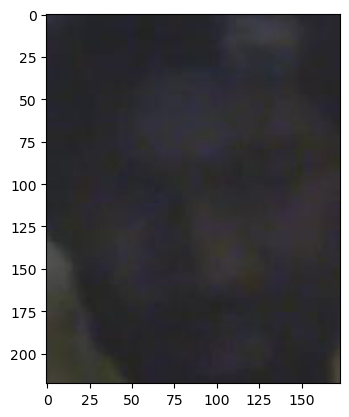

In [10]:
#from retinaface import RetinaFace
from PIL import Image
import matplotlib.pyplot as plt
import os
import gc
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
  
# open method used to open different extension image file
im = Image.open("crop_frames/19435_frame_00023.jpg") 
  
# This method will show image in any image viewer 
plt.imshow(im) 

In [7]:
import os
import cv2

FRAME_PATH = "crop_frames"

# count number of image files in frames directory
total_frames = 0
for file_name in os.listdir(FRAME_PATH):
    if file_name.endswith(".jpg"):
        total_frames += 1

print(f"Total frames: {total_frames}")



Total frames: 147328


In [9]:
import os
import numpy as np
import cv2
from multiprocessing import Pool
import tqdm

CROP_FRAME_PATH = "crop_frames"
VIDEO_COUNT = len(os.listdir(CROP_FRAME_PATH)) // 32

def load_and_process_image(frame_path):
    img = cv2.imread(frame_path)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    img = img[..., ::-1]  # Convert BGR to RGB
    return img

def process_video_chunk(args):
    index, chunk = args
    video_data = []
    for frame in chunk:
        frame_path = os.path.join(CROP_FRAME_PATH, frame)
        img = load_and_process_image(frame_path)
        video_data.append(img)
    return index, video_data

def build_dataset():
    dataset = [None] * VIDEO_COUNT
    all_frames = sorted(os.listdir(CROP_FRAME_PATH))
    
    with Pool() as pool:
        chunks = [(i, all_frames[i*32:(i+1)*32]) for i in range(VIDEO_COUNT)]
        for index, chunk_data in tqdm.tqdm(pool.imap_unordered(process_video_chunk, chunks), total=VIDEO_COUNT):
            dataset[index] = chunk_data
    
    return np.array(dataset)

test_dataset = build_dataset()
print(test_dataset.shape)




100%|███████████████████████████████████████| 4604/4604 [01:06<00:00, 68.82it/s]


(4604, 32, 224, 224, 3)


In [10]:
import numpy as np

size_in_bytes = test_dataset.nbytes
size_in_gb = size_in_bytes / (1024 ** 3)

print("Size of test_dataset in GB: {:.2f} GB".format(size_in_gb))

Size of test_dataset in GB: 20.65 GB


In [14]:
np.save("test_dataset.npy", test_dataset)

In [11]:
test_dataset.dtype

dtype('uint8')

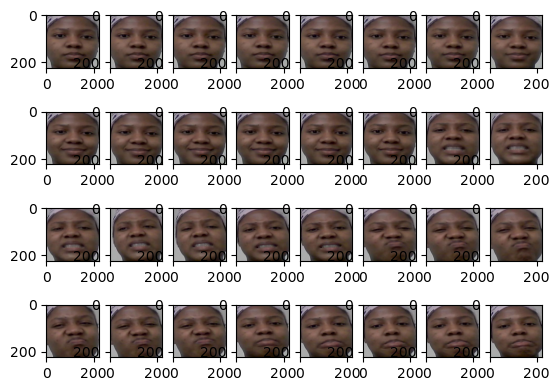

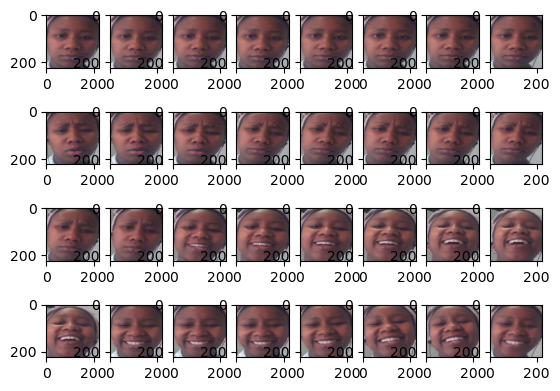

In [12]:
import matplotlib.pyplot as plt

# Display images from the first chunk
fig, axs = plt.subplots(4, 8)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(test_dataset[0, i])
plt.show()

# Display images from the second chunk
fig, axs = plt.subplots(4, 8)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(test_dataset[1, i])
plt.show()



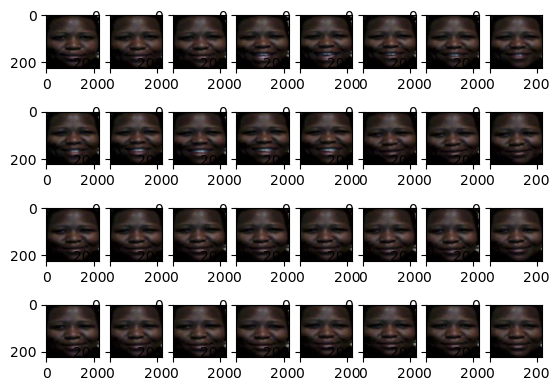

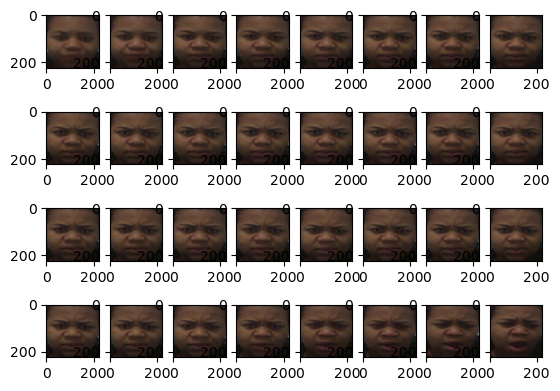

In [15]:
import matplotlib.pyplot as plt

# Display images from the first chunk
fig, axs = plt.subplots(4, 8)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(test_dataset[10, i])
plt.show()

# Display images from the second chunk
fig, axs = plt.subplots(4, 8)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(test_dataset[4603, i])
plt.show()